# goals
* explore the mismatch between lensed, RP and NP waveforms
* explore the conditions for indistinguishable waveforms

# import modules

In [1]:
import sys

sys.path.insert(0, "../")
from modules.Classes_ver0 import *
from modules.default_params_ver0 import *
from modules.functions_ver0 import *

# define Classes & methods

In [3]:
# override the integrand_delta_phi function in the Precessing class


### get the delta phi_P
def integrand_delta_phi_here(self, y, f):
    """integrand for delta phi p (equations in Apostolatos 1994, and appendix of Evangelos in prep)"""
    LdotN = self.LdotN(f)
    cos_i_JN, sin_i_JN, cos_o_XH, sin_o_XH = self.precession_angles()
    f_dot = self.f_dot(f)

    Omega_LJ = (
        1000
        * self.omega_tilde
        * (f / self.f_cut()) ** (5 / 3)
        / (self.total_mass() / self.SOLMASS2SEC)
    )

    if self.theta_tilde == 0:  # non-precessing
        integrand_delta_phi = -Omega_LJ

    elif cos_i_JN == 1:  # face-on (precessing & non-precessing)
        integrand_delta_phi = -Omega_LJ * np.cos(self.theta_LJ(f)) / f_dot

    elif LdotN == 1:
        # NOT face-on & precessing (already accounted for above), but when L and N are aligned at some point in the precession cycle
        integrand_delta_phi = 0

    else:
        integrand_delta_phi = (
            (LdotN / (1 - LdotN**2))
            * Omega_LJ
            * np.sin(self.theta_LJ(f))
            * (
                np.cos(self.theta_LJ(f)) * sin_i_JN * np.sin(self.phi_LJ(f))
                - np.sin(self.theta_LJ(f)) * cos_i_JN
            )
            / f_dot
        )

    return integrand_delta_phi


Precessing.integrand_delta_phi = integrand_delta_phi_here

# assign lensing parameters

In [4]:
solar_mass = 4.92624076 * 1e-6  # [solar_mass] = sec
giga_parsec = 1.02927125 * 1e17  # [giga_parsec] = sec
year = 31557600  # [year] = sec

lensing_params_0 = {
    "theta_S": np.pi / 4,
    "phi_S": 0.0,
    "theta_L": 0.0,  # also theta_J
    "phi_L": 0.0,  # also phi_J
    "mcz": 10 * solar_mass,
    "dist": 1.5 * giga_parsec,
    "eta": 0.25,  # symmetric mass ratio, dimensionless
    "tc": 0.0,
    "phi_c": 0.0,
    "y": 0.25,
    "MLz": 1e3 * solar_mass,
}

lensing_params = lensing_params_0.copy()

f_min = 20
delta_f = 0.05

# assign precessing parameters

In [5]:
solar_mass = 4.92624076 * 1e-6  # [solar_mass] = sec
giga_parsec = 1.02927125 * 1e17  # [giga_parsec] = sec
year = 31557600  # [year] = sec


# ----------------------------------
# default system


RP_params_0 = {
    "theta_S": np.pi / 4,
    "phi_S": 0.0,
    "theta_J": np.pi / 2,
    "phi_J": np.pi / 2,
    "mcz": 10 * solar_mass,
    "dist": 1.5 * giga_parsec,
    "eta": 0.25,
    "tc": 0.0,
    "phi_c": 0.0,
    "theta_tilde": 4.0,
    "omega_tilde": 1.0,
    "gamma_P": 0.0,
}


NP_params_0 = {
    "theta_S": np.pi / 4,
    "phi_S": 0.0,
    "theta_J": np.pi / 2,
    "phi_J": np.pi / 2,
    "mcz": 10 * solar_mass,
    "dist": 1.5 * giga_parsec,
    "eta": 0.25,
    "tc": 0.0,
    "phi_c": 0.0,
    "theta_tilde": 0.0,
    "omega_tilde": 0.0,
    "gamma_P": 0.0,
}

RP_params = RP_params_0.copy()
NP_params = NP_params_0.copy()

f_min = 20
delta_f = 0.05

# testing

Text(0, 0.5, '$\\epsilon$')

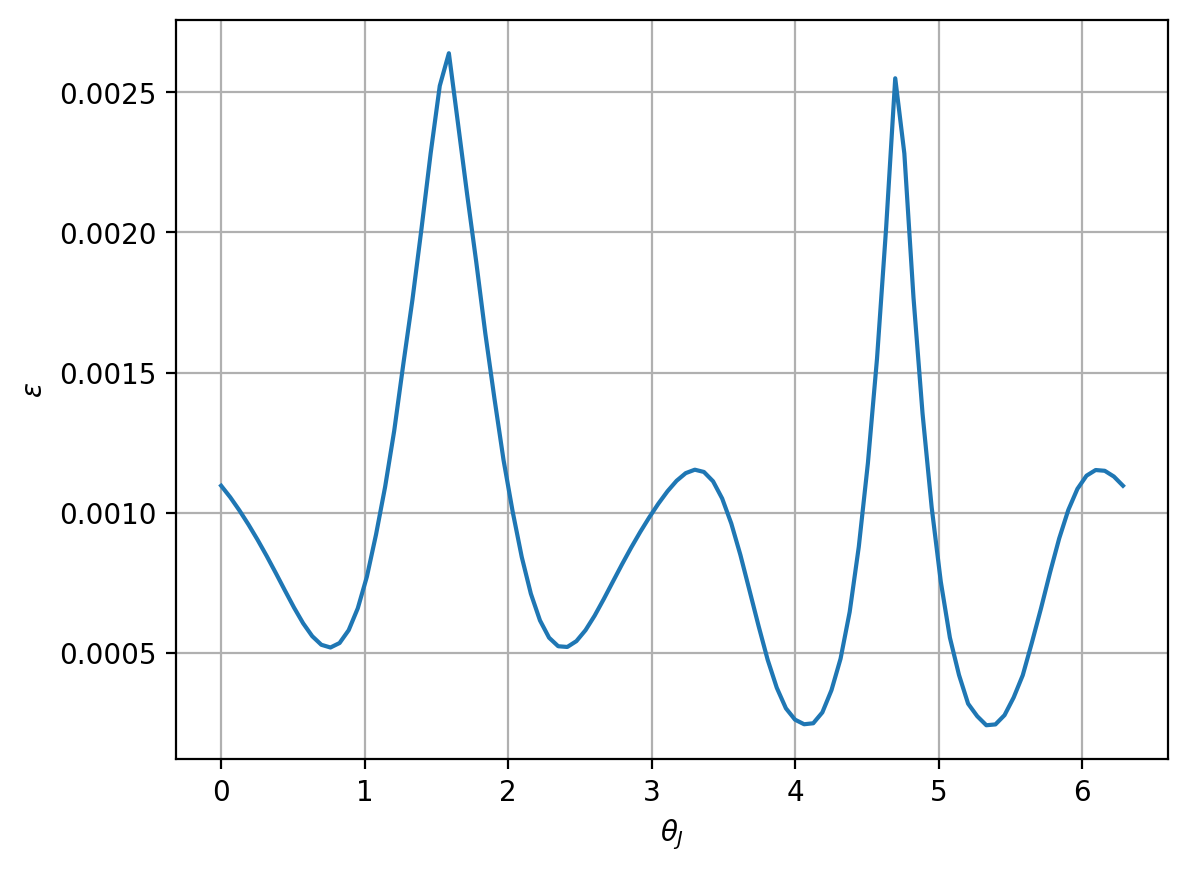

In [15]:
lensing_params = lensing_params_0.copy()
RP_params = RP_params_0.copy()

# set both lensing and precession parameters to same location

lensing_params["theta_L"] = RP_params["theta_J"] = np.pi / 2
lensing_params["phi_L"] = RP_params["phi_J"] = np.pi / 2
lensing_params["theta_S"] = RP_params["theta_S"] = np.pi / 4
lensing_params["phi_S"] = RP_params["phi_S"] = 0

# assign mcz as 50 solar masses for both lensing and precession
lensing_params["mcz"] = RP_params["mcz"] = 50 * solar_mass

# plot mismatch as a function of theta_J

theta_J_array = np.linspace(0, 2 * np.pi, 100)
ep_array = []

for theta_J in theta_J_array:
    lensing_params["theta_J"] = theta_J
    RP_params["theta_J"] = theta_J

    ep_min, g_min, ep_max, g_max, ep_0 = mismatch_epsilon_min_max(
        lensing_params, RP_params, NP_params, "L & RP"
    )

    ep_array.append(ep_min)

plt.plot(theta_J_array, ep_array, label=r"$\epsilon_{min}$")
plt.grid()
# plt.legend()
plt.xlabel(r"$\theta_J$")
plt.ylabel(r"$\epsilon$")

Text(0, 0.5, '$\\epsilon$')

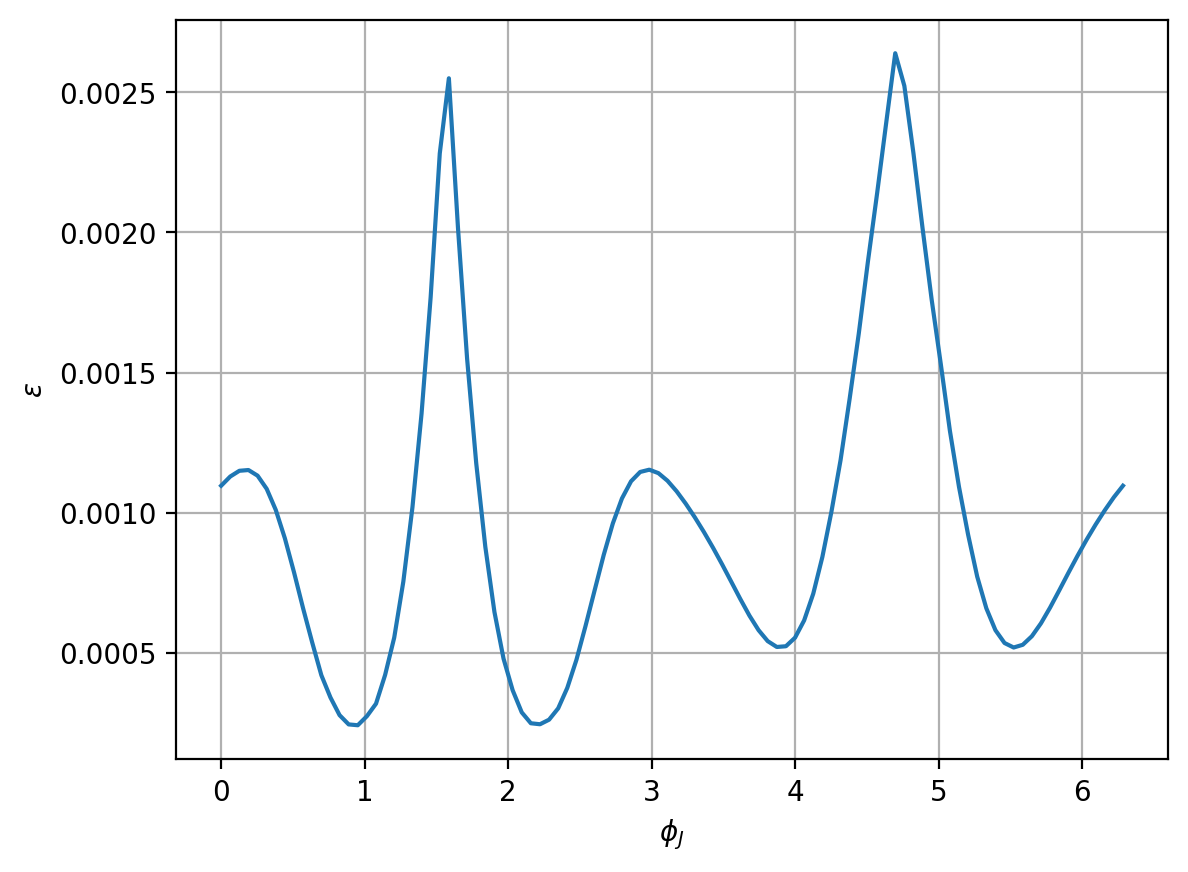

In [16]:
lensing_params = lensing_params_0.copy()
RP_params = RP_params_0.copy()

# set both lensing and precession parameters to same location

lensing_params["theta_L"] = RP_params["theta_J"] = np.pi / 2
lensing_params["phi_L"] = RP_params["phi_J"] = np.pi / 2
lensing_params["theta_S"] = RP_params["theta_S"] = np.pi / 4
lensing_params["phi_S"] = RP_params["phi_S"] = 0

# assign mcz as 50 solar masses for both lensing and precession
lensing_params["mcz"] = RP_params["mcz"] = 50 * solar_mass

# plot mismatch as a function of phi_J

phi_J_array = np.linspace(0, 2 * np.pi, 100)
ep_array = []

for phi_J in phi_J_array:
    lensing_params["phi_J"] = phi_J
    RP_params["phi_J"] = phi_J

    ep_min, g_min, ep_max, g_max, ep_0 = mismatch_epsilon_min_max(
        lensing_params, RP_params, NP_params, "L & RP"
    )

    ep_array.append(ep_min)

plt.plot(phi_J_array, ep_array, label=r"$\epsilon_{min}$")
plt.grid()
# plt.legend()
plt.xlabel(r"$\phi_J$")
plt.ylabel(r"$\epsilon$")

# plot mismatch

In [10]:
# using Saif's choice of sky locations
sky_locs_J = sky_locs_J_S.copy()
sky_locs_S = sky_locs_S_S.copy()


def mismatch_plot_panel(param_name, param_unit, param_array, xlabel, title):
    # plot mismatch as a function of param_name

    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(9, 12))
    fig.subplots_adjust(hspace=0.5)
    fig.subplots_adjust(wspace=0.5)

    for r, ((theta_J, phi_J), (theta_S, phi_S)) in enumerate(
        zip(sky_locs_J, sky_locs_S)
    ):
        # set lensed, RP, NP to same location
        lensing_params["theta_L"] = RP_params["theta_J"] = NP_params["theta_J"] = (
            theta_J
        )
        lensing_params["phi_L"] = RP_params["phi_J"] = NP_params["phi_J"] = phi_J
        lensing_params["theta_S"] = RP_params["theta_S"] = NP_params["theta_S"] = (
            theta_S
        )
        lensing_params["phi_S"] = RP_params["phi_S"] = NP_params["phi_S"] = phi_S

        I_array = np.empty(0)
        Delta_td_array = np.empty(0)

        for cmd in ["L & RP", "L & NP", "RP & NP"]:
            ep_array = []

            for param in param_array:
                if param_name in lensing_params.keys():
                    lensing_params[param_name] = param * param_unit
                if param_name in RP_params.keys():
                    RP_params[param_name] = param * param_unit
                if (param_name in NP_params.keys()) and (
                    param_name not in ["theta_tilde", "omega_tilde", "gamma_P"]
                ):
                    NP_params[param_name] = param * param_unit

                if (cmd == "L & RP") and (xlabel == r"$I$"):
                    lensing_inst = LensingGeo(lensing_params)
                    I_array = np.append(I_array, lensing_inst.I())

                if (cmd == "L & RP") and (xlabel == r"$\Delta t_d$"):
                    lensing_inst = LensingGeo(lensing_params)
                    Delta_td_array = np.append(Delta_td_array, lensing_inst.Delta_td())

                ep_min, g_min, ep_max, g_max, ep_0 = mismatch_epsilon_min_max(
                    lensing_params, RP_params, NP_params, cmd
                )

                ep_array.append(ep_min)

            ls = {"L & RP": "-", "L & NP": "--", "RP & NP": ":"}
            color = plt.rcParams["axes.prop_cycle"].by_key()["color"][r]

            if xlabel == r"$I$":
                axes[r].plot(I_array, ep_array, ls=ls[cmd], color=color, label=cmd)
            elif xlabel == r"$\Delta t_d$":
                axes[r].plot(
                    Delta_td_array, ep_array, ls=ls[cmd], color=color, label=cmd
                )
            else:
                axes[r].plot(param_array, ep_array, ls=ls[cmd], color=color, label=cmd)

            axes[r].legend()
            axes[r].set_xlabel(xlabel)
            axes[r].set_ylabel(r"$\epsilon$")
            axes[r].set_title(
                r"$\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}, $\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}".format(
                    theta_J, phi_J, theta_S, phi_S
                )
            )

    fig.suptitle(title, fontsize=16)

/var/folders/y_/v4l1jv1j5b55928djlvnhnm40000gp/T/ipykernel_78489/203111816.py:137: RuntimeWarning: divide by zero encountered in divide
  tan_psi = num_psi / den_psi


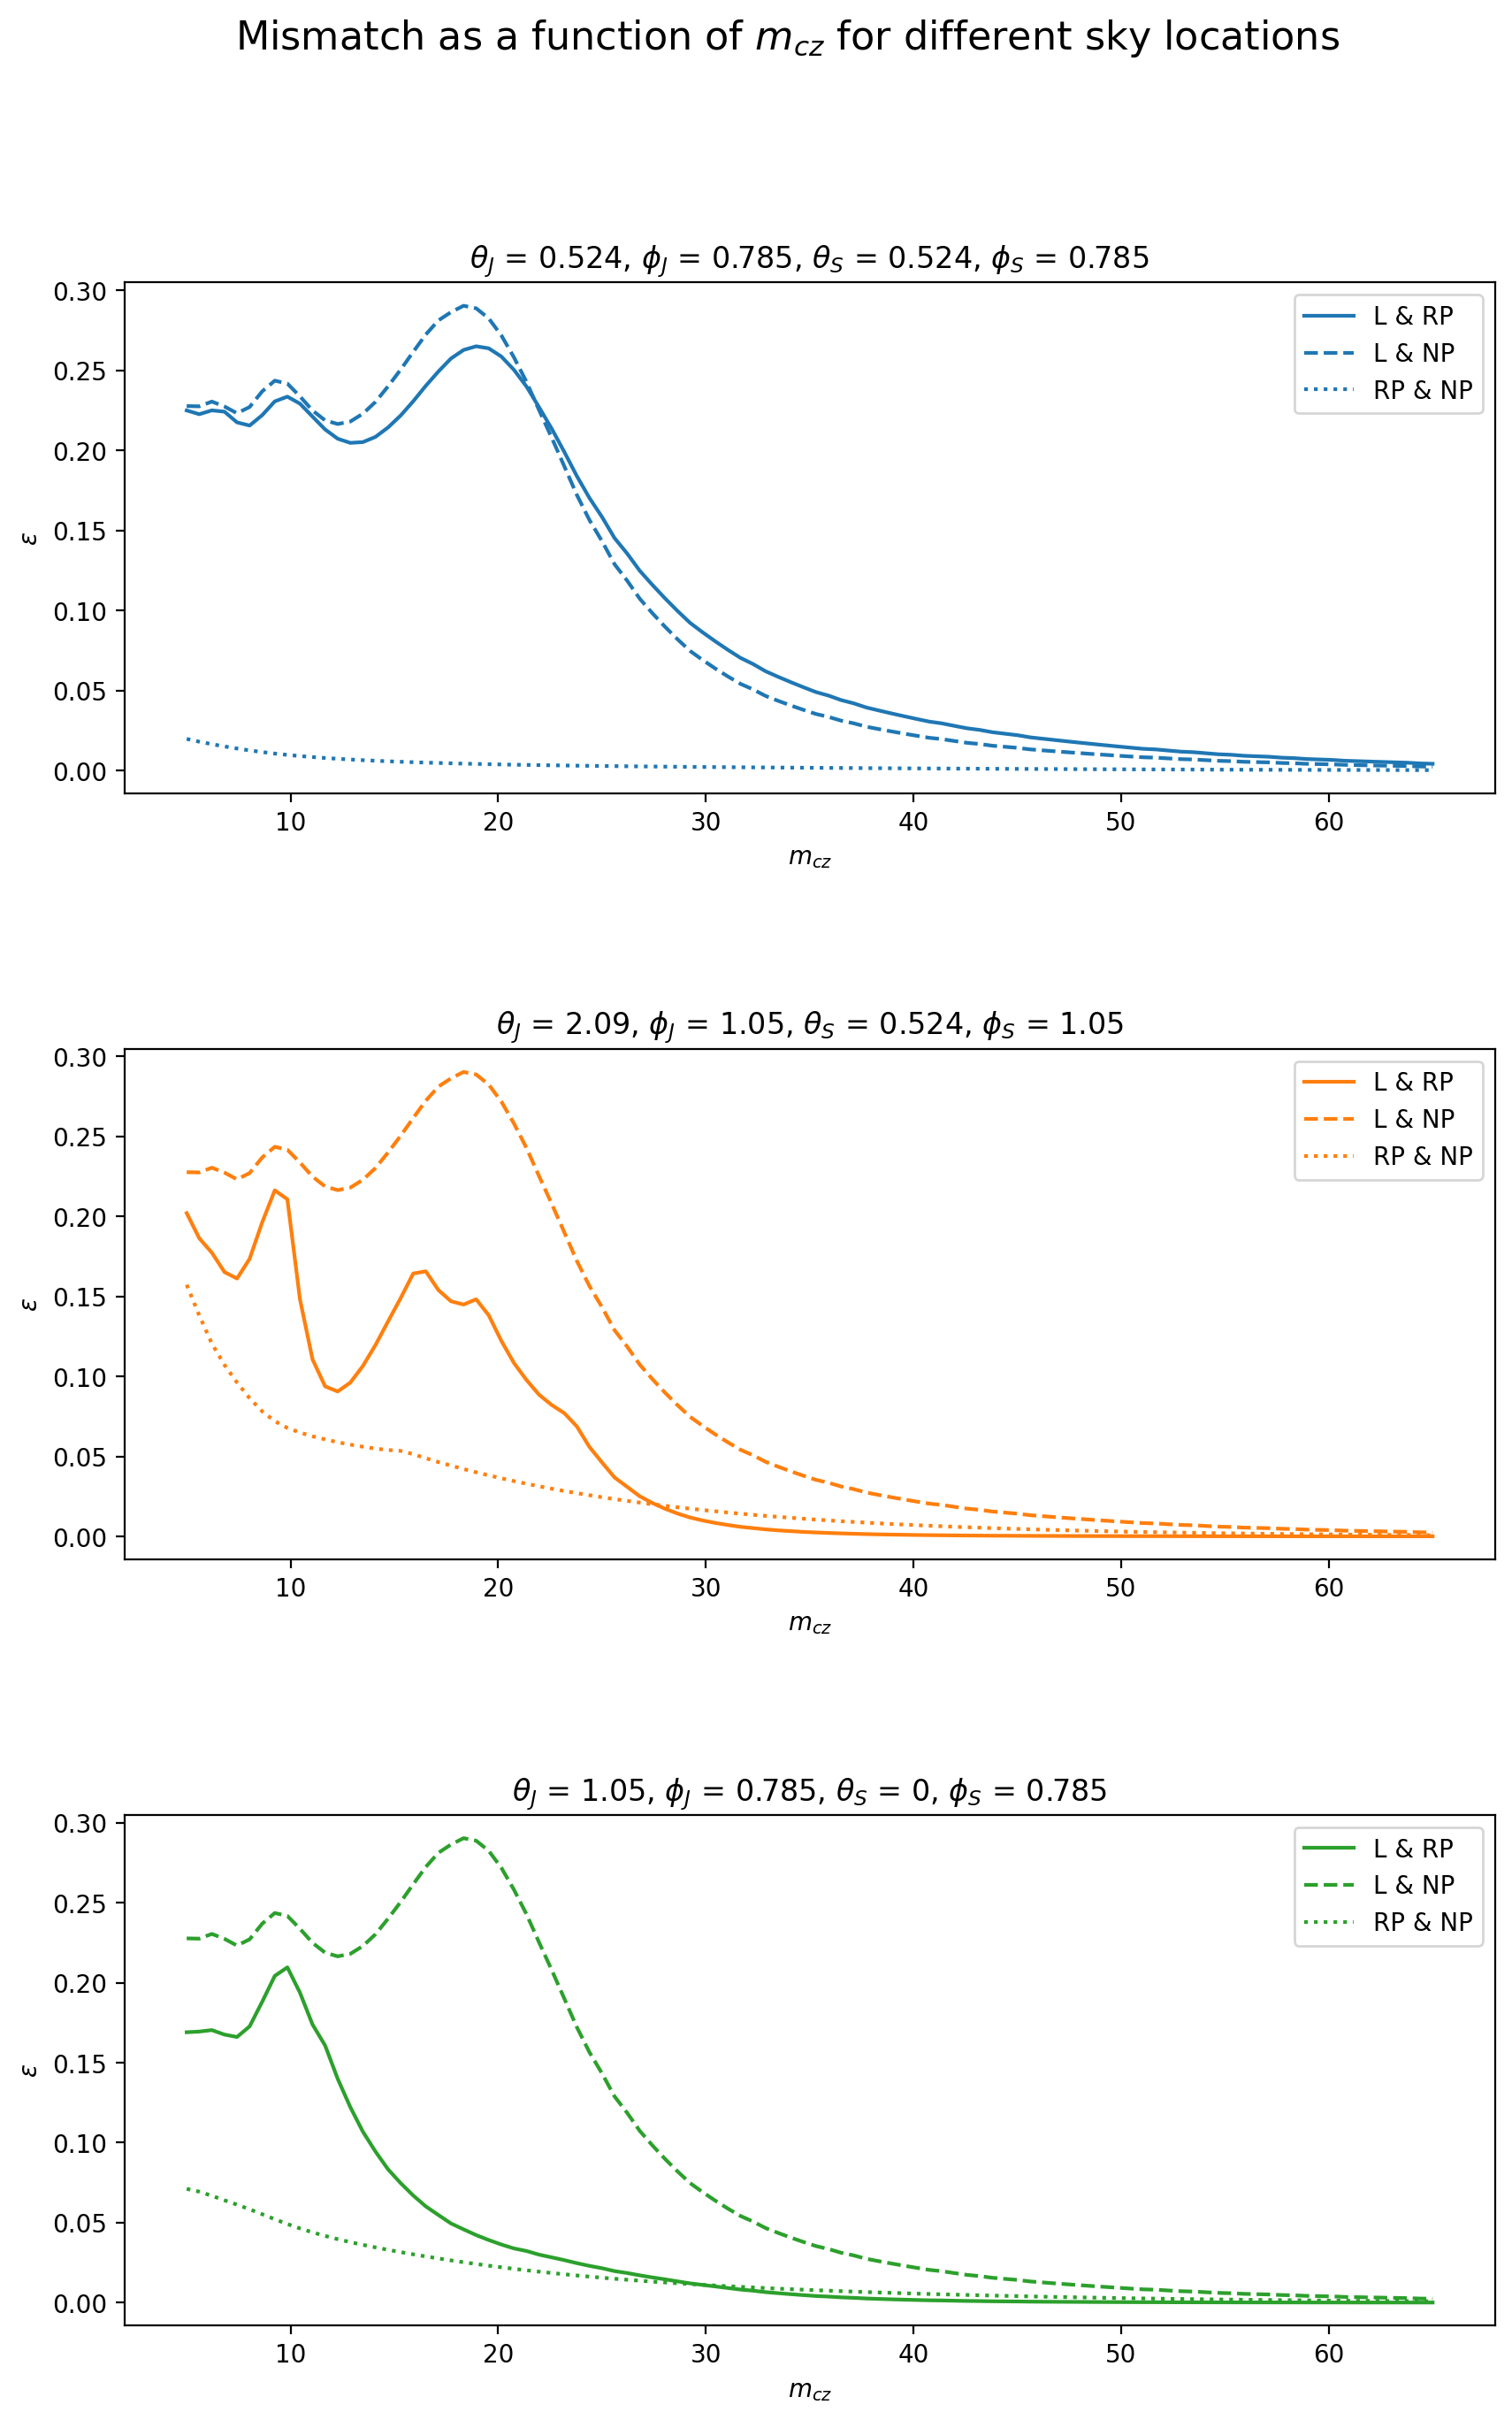

In [30]:
lensing_params = lensing_params_0.copy()
RP_params = RP_params_0.copy()
NP_params = NP_params_0.copy()

# using Saif's choice of sky locations
sky_locs_J = sky_locs_J_S.copy()
sky_locs_S = sky_locs_S_S.copy()

# plot mismatch panel as a function of mcz
mcz_array = np.linspace(5, 65, 100)

mismatch_plot_panel(
    "mcz",
    solar_mass,
    mcz_array,
    r"$m_{cz}$",
    r"Mismatch as a function of $m_{cz}$ for different sky locations",
)

/var/folders/y_/v4l1jv1j5b55928djlvnhnm40000gp/T/ipykernel_78489/203111816.py:137: RuntimeWarning: divide by zero encountered in divide
  tan_psi = num_psi / den_psi


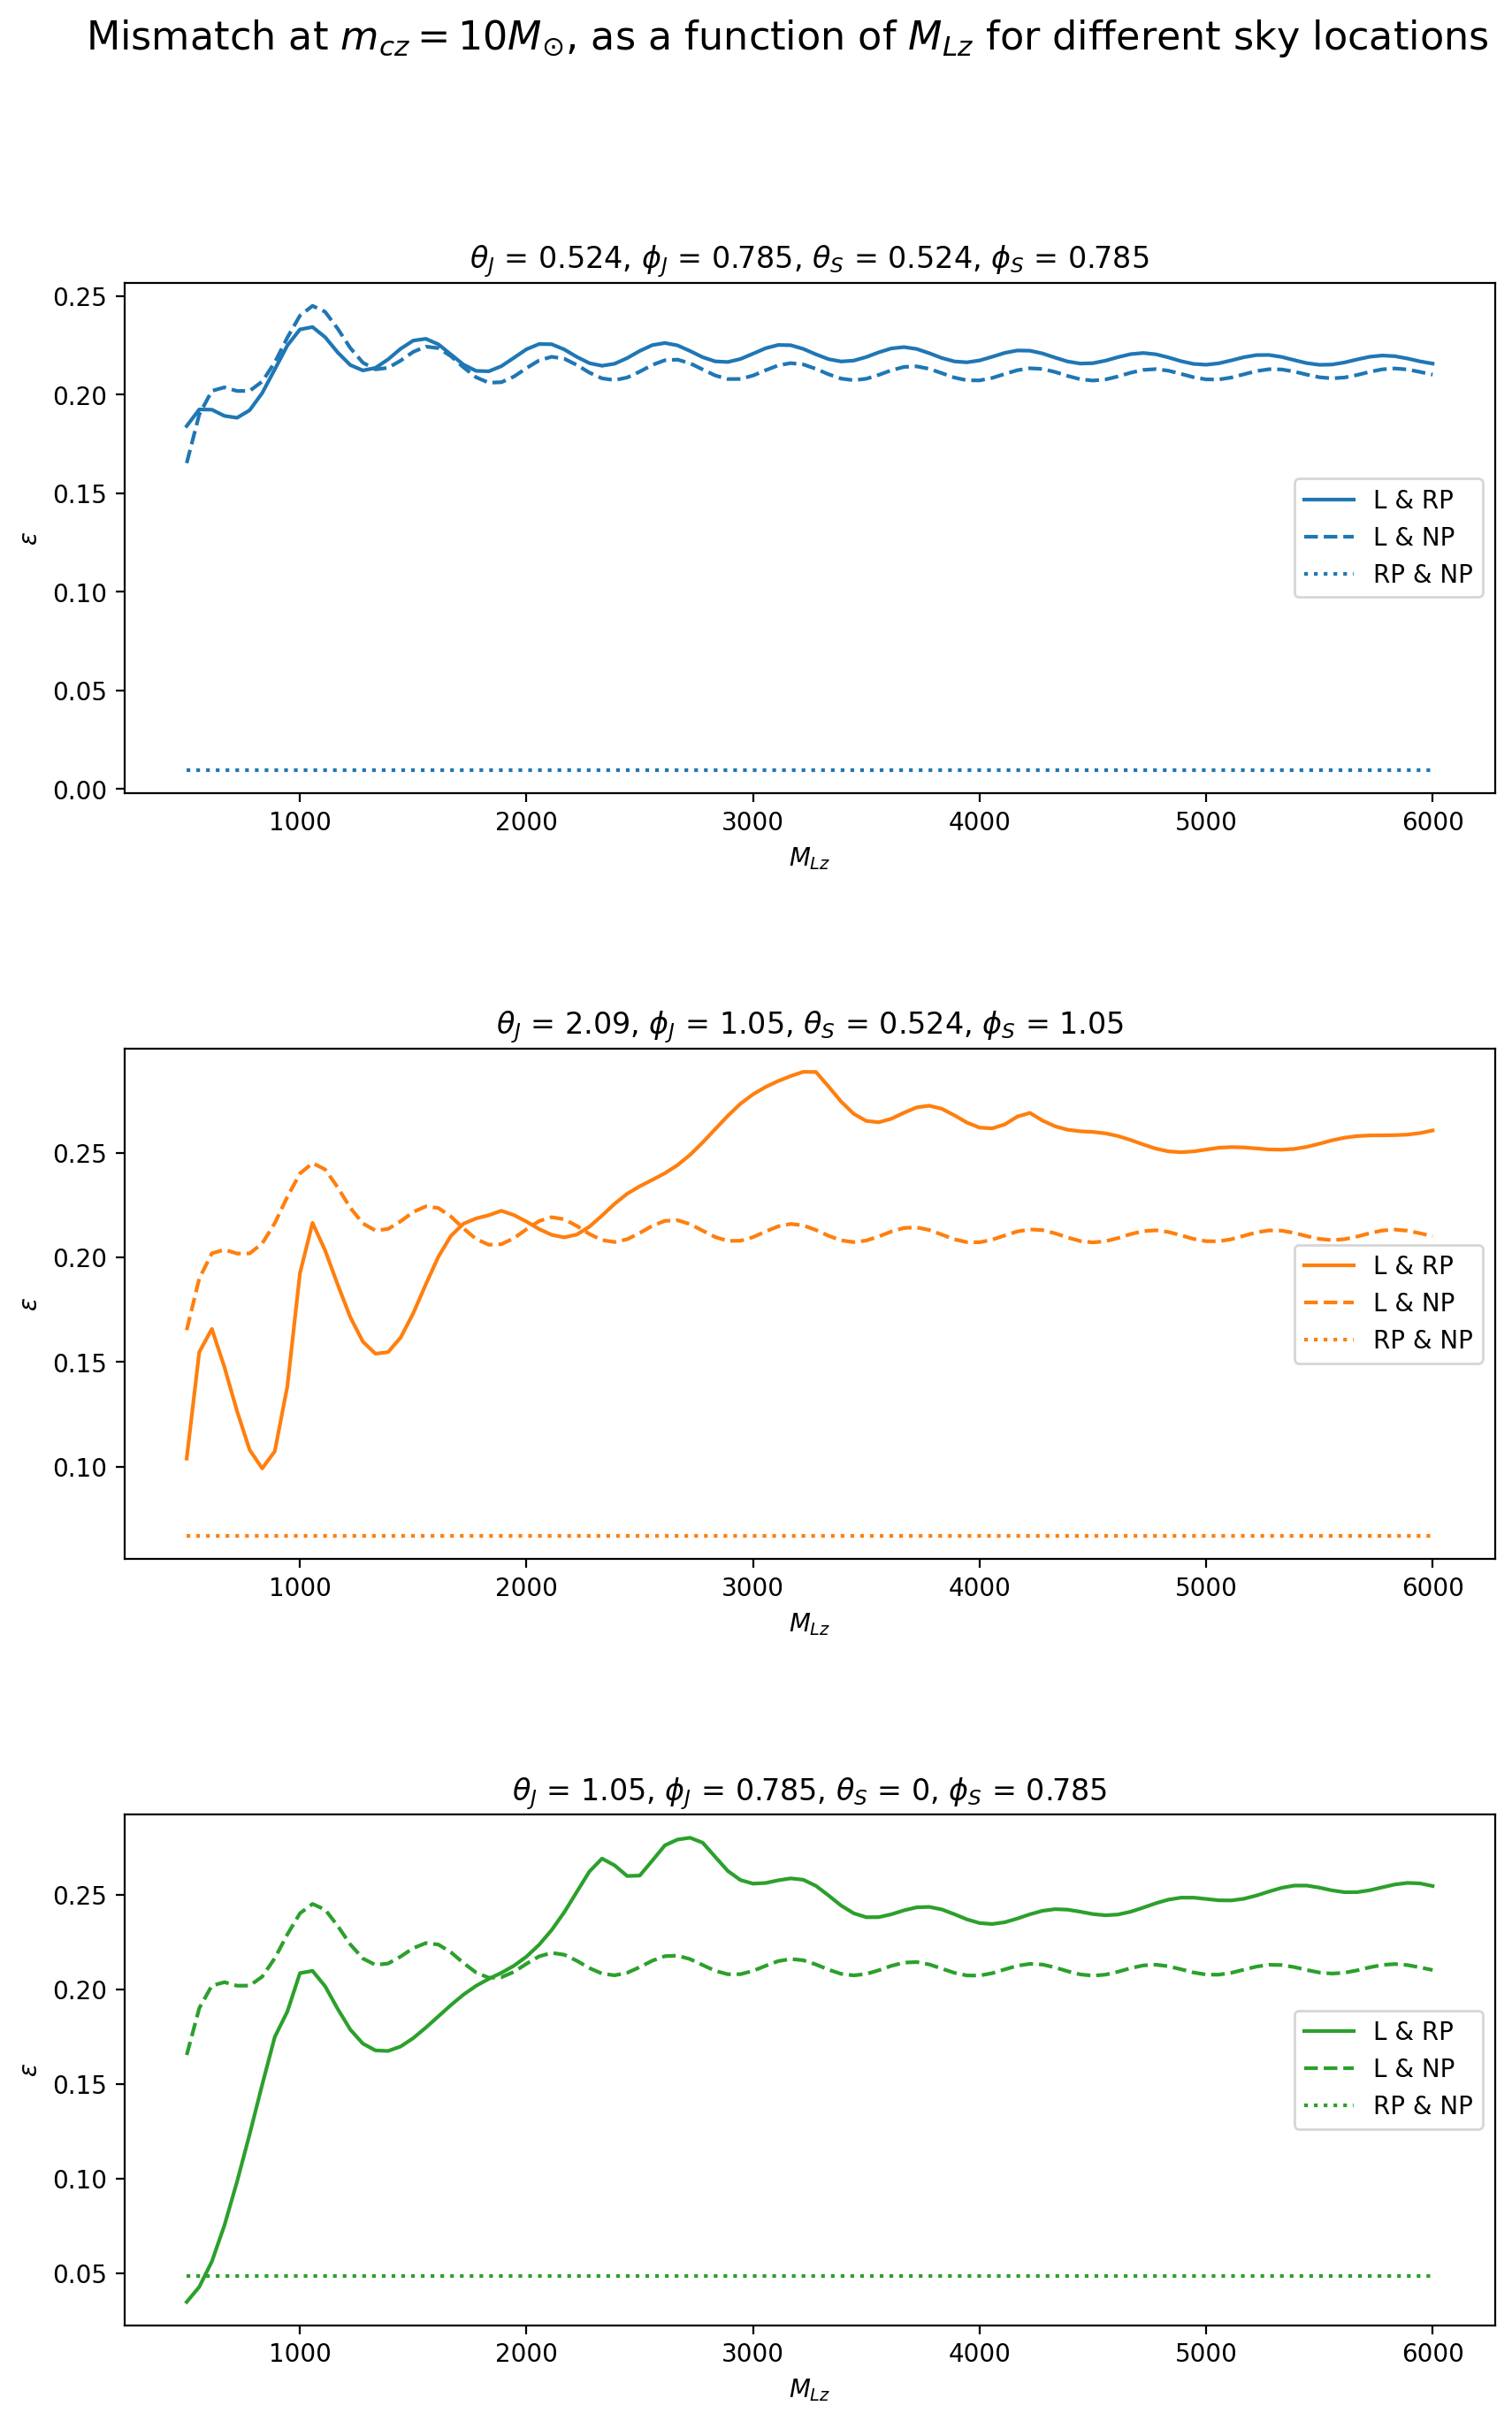

In [43]:
lensing_params = lensing_params_0.copy()
RP_params = RP_params_0.copy()
NP_params = NP_params_0.copy()
# mcz = 10 by default

# using Saif's choice of sky locations
sky_locs_J = sky_locs_J_S.copy()
sky_locs_S = sky_locs_S_S.copy()

# assign mcz to 10
mcz = 10
lensing_params["mcz"] = RP_params["mcz"] = NP_params["mcz"] = mcz * solar_mass

# plot mismatch panel as a function of MLz
MLz_array = np.linspace(500, 6000, 100)

mismatch_plot_panel(
    "MLz",
    solar_mass,
    MLz_array,
    r"$M_{Lz}$",
    r"Mismatch at $m_{cz} = 10 M_{\odot}$, as a function of $M_{Lz}$ for different sky locations",
)

/var/folders/y_/v4l1jv1j5b55928djlvnhnm40000gp/T/ipykernel_78489/203111816.py:137: RuntimeWarning: divide by zero encountered in divide
  tan_psi = num_psi / den_psi


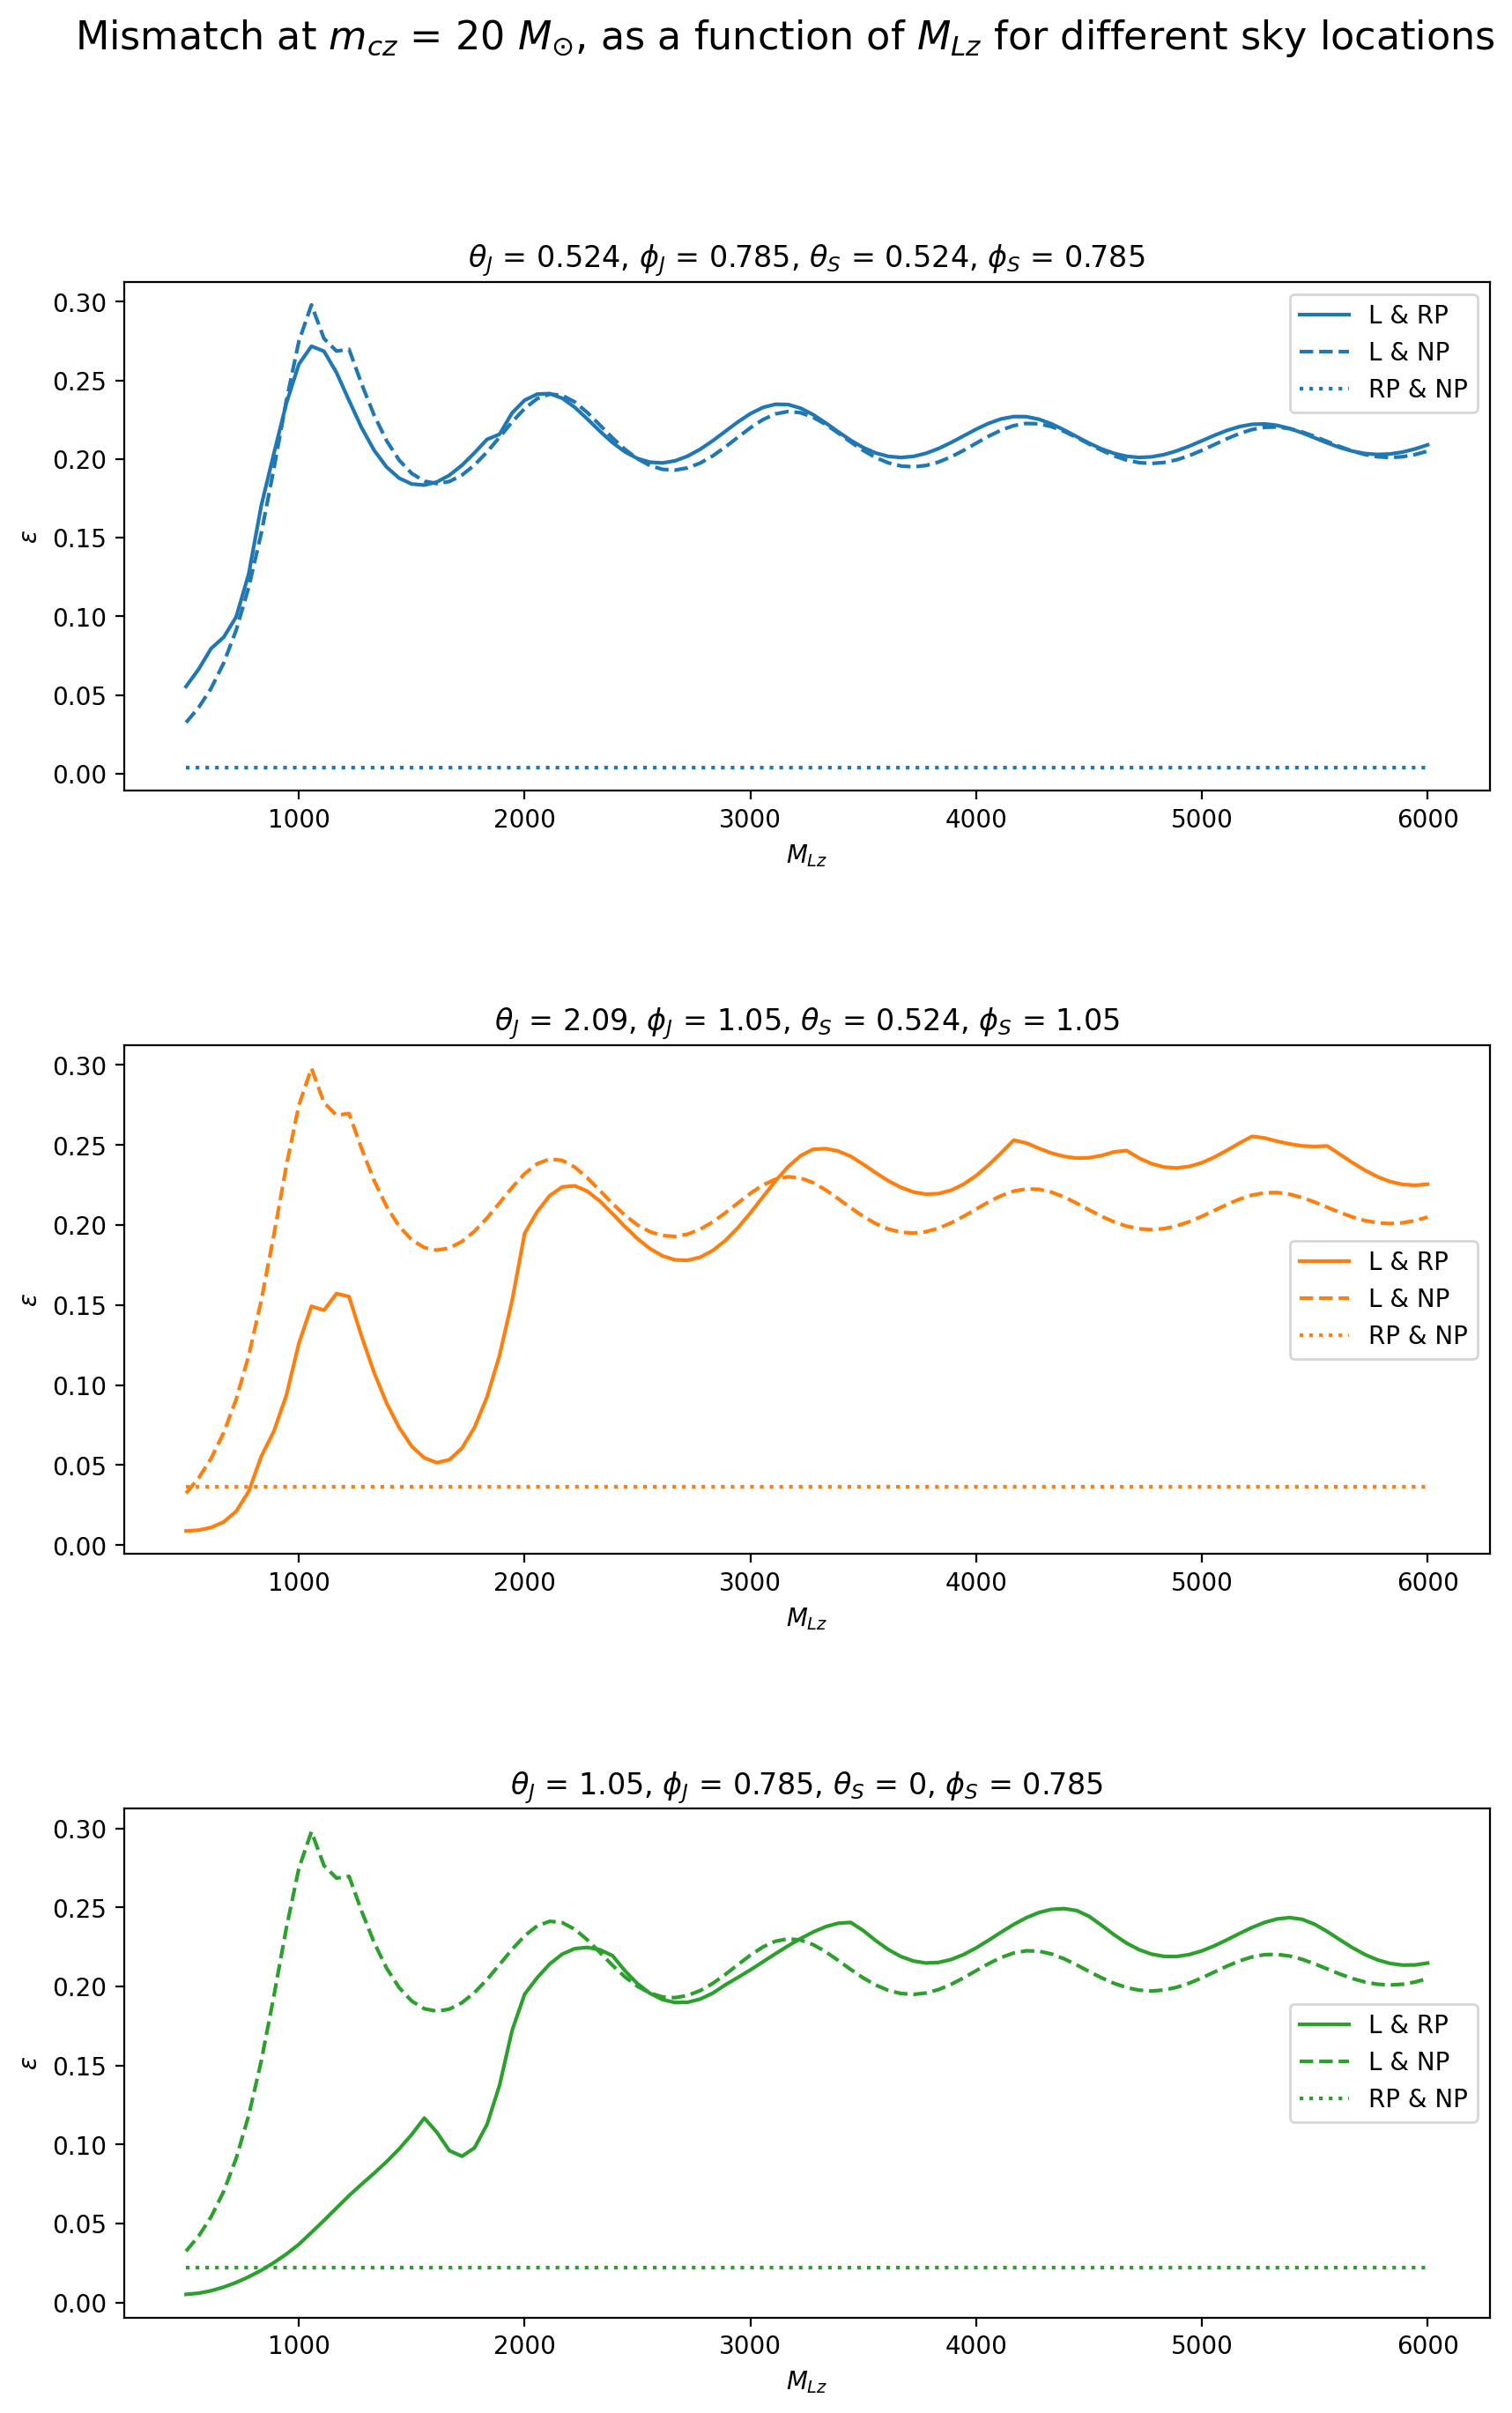

In [42]:
lensing_params = lensing_params_0.copy()
RP_params = RP_params_0.copy()
NP_params = NP_params_0.copy()

# using Saif's choice of sky locations
sky_locs_J = sky_locs_J_S.copy()
sky_locs_S = sky_locs_S_S.copy()

# assign mcz to 20
mcz = 20
lensing_params["mcz"] = RP_params["mcz"] = NP_params["mcz"] = mcz * solar_mass

# plot mismatch panel as a function of MLz
MLz_array = np.linspace(500, 6000, 100)

mismatch_plot_panel(
    "MLz",
    solar_mass,
    MLz_array,
    r"$M_{Lz}$",
    r"Mismatch at $m_{cz}$ = 20 $M_{\odot}$, as a function of $M_{Lz}$ for different sky locations",
)

/var/folders/y_/v4l1jv1j5b55928djlvnhnm40000gp/T/ipykernel_78489/203111816.py:137: RuntimeWarning: divide by zero encountered in divide
  tan_psi = num_psi / den_psi


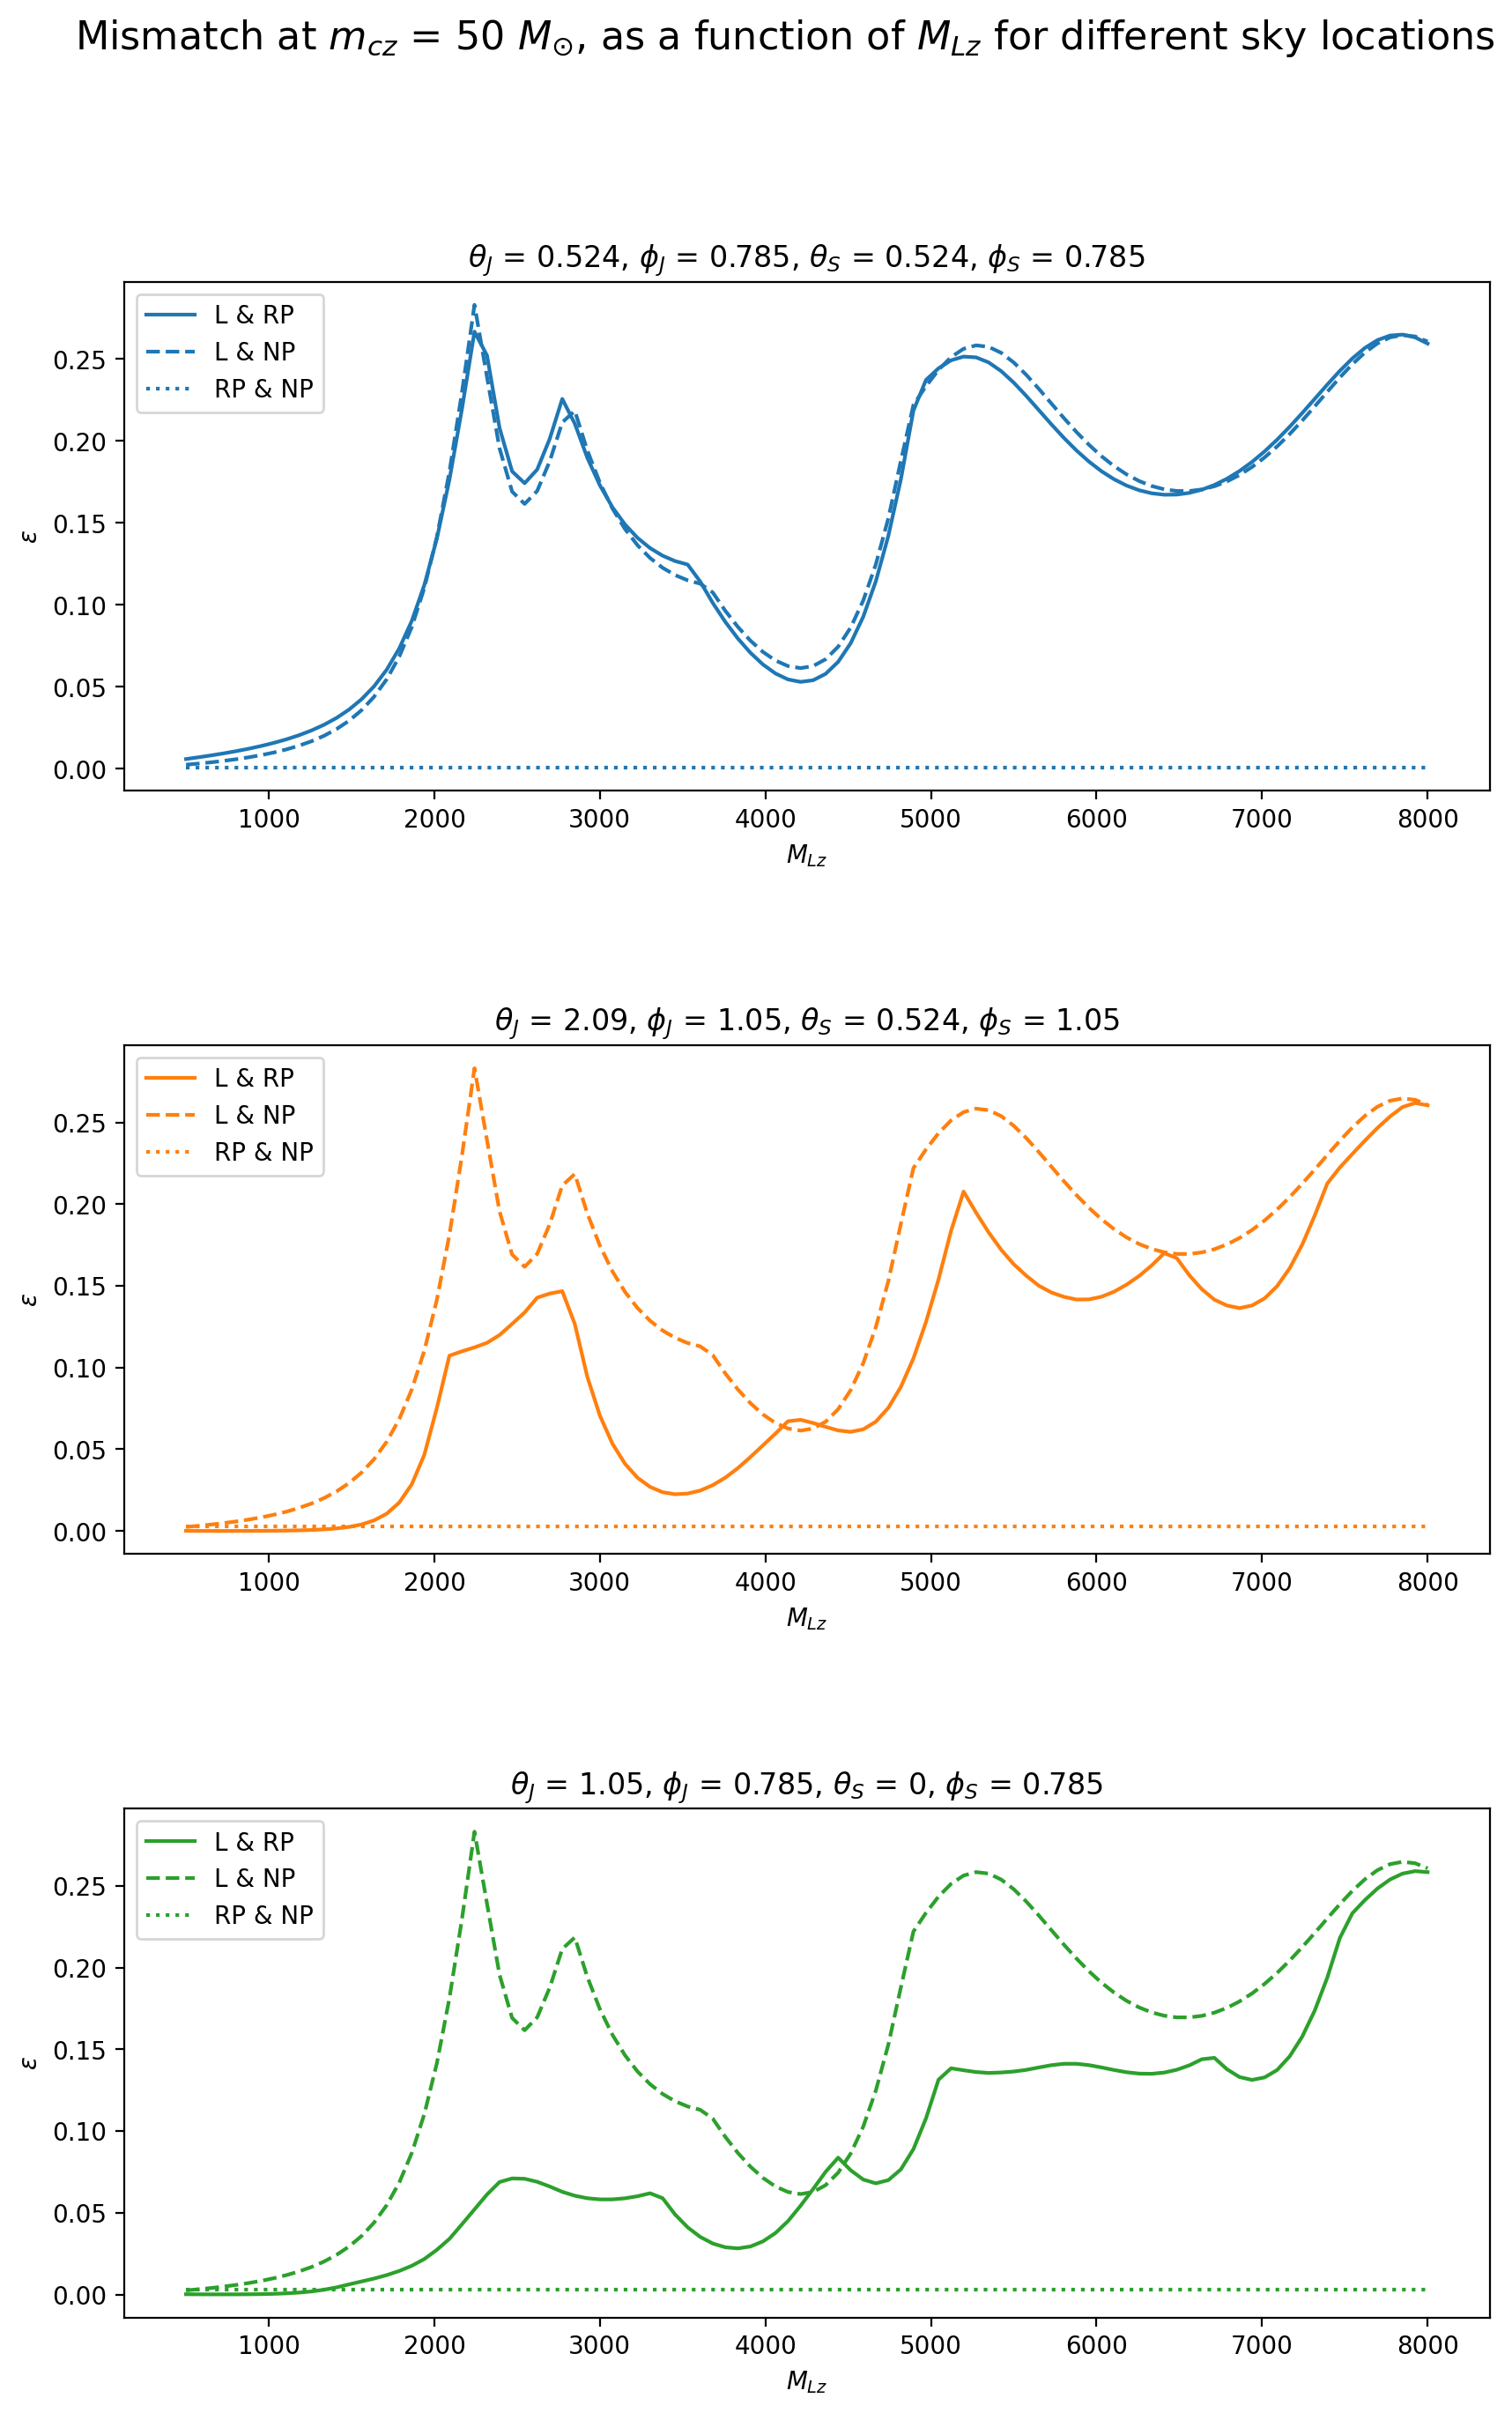

In [44]:
lensing_params = lensing_params_0.copy()
RP_params = RP_params_0.copy()
NP_params = NP_params_0.copy()

# using Saif's choice of sky locations
sky_locs_J = sky_locs_J_S.copy()
sky_locs_S = sky_locs_S_S.copy()

# assign mcz to 50
mcz = 50
lensing_params["mcz"] = RP_params["mcz"] = NP_params["mcz"] = mcz * solar_mass

# plot mismatch panel as a function of MLz
MLz_array = np.linspace(500, 8000, 100)

mismatch_plot_panel(
    "MLz",
    solar_mass,
    MLz_array,
    r"$M_{Lz}$",
    r"Mismatch at $m_{cz}$ = 50 $M_{\odot}$, as a function of $M_{Lz}$ for different sky locations",
)

/var/folders/y_/v4l1jv1j5b55928djlvnhnm40000gp/T/ipykernel_78489/203111816.py:137: RuntimeWarning: divide by zero encountered in divide
  tan_psi = num_psi / den_psi


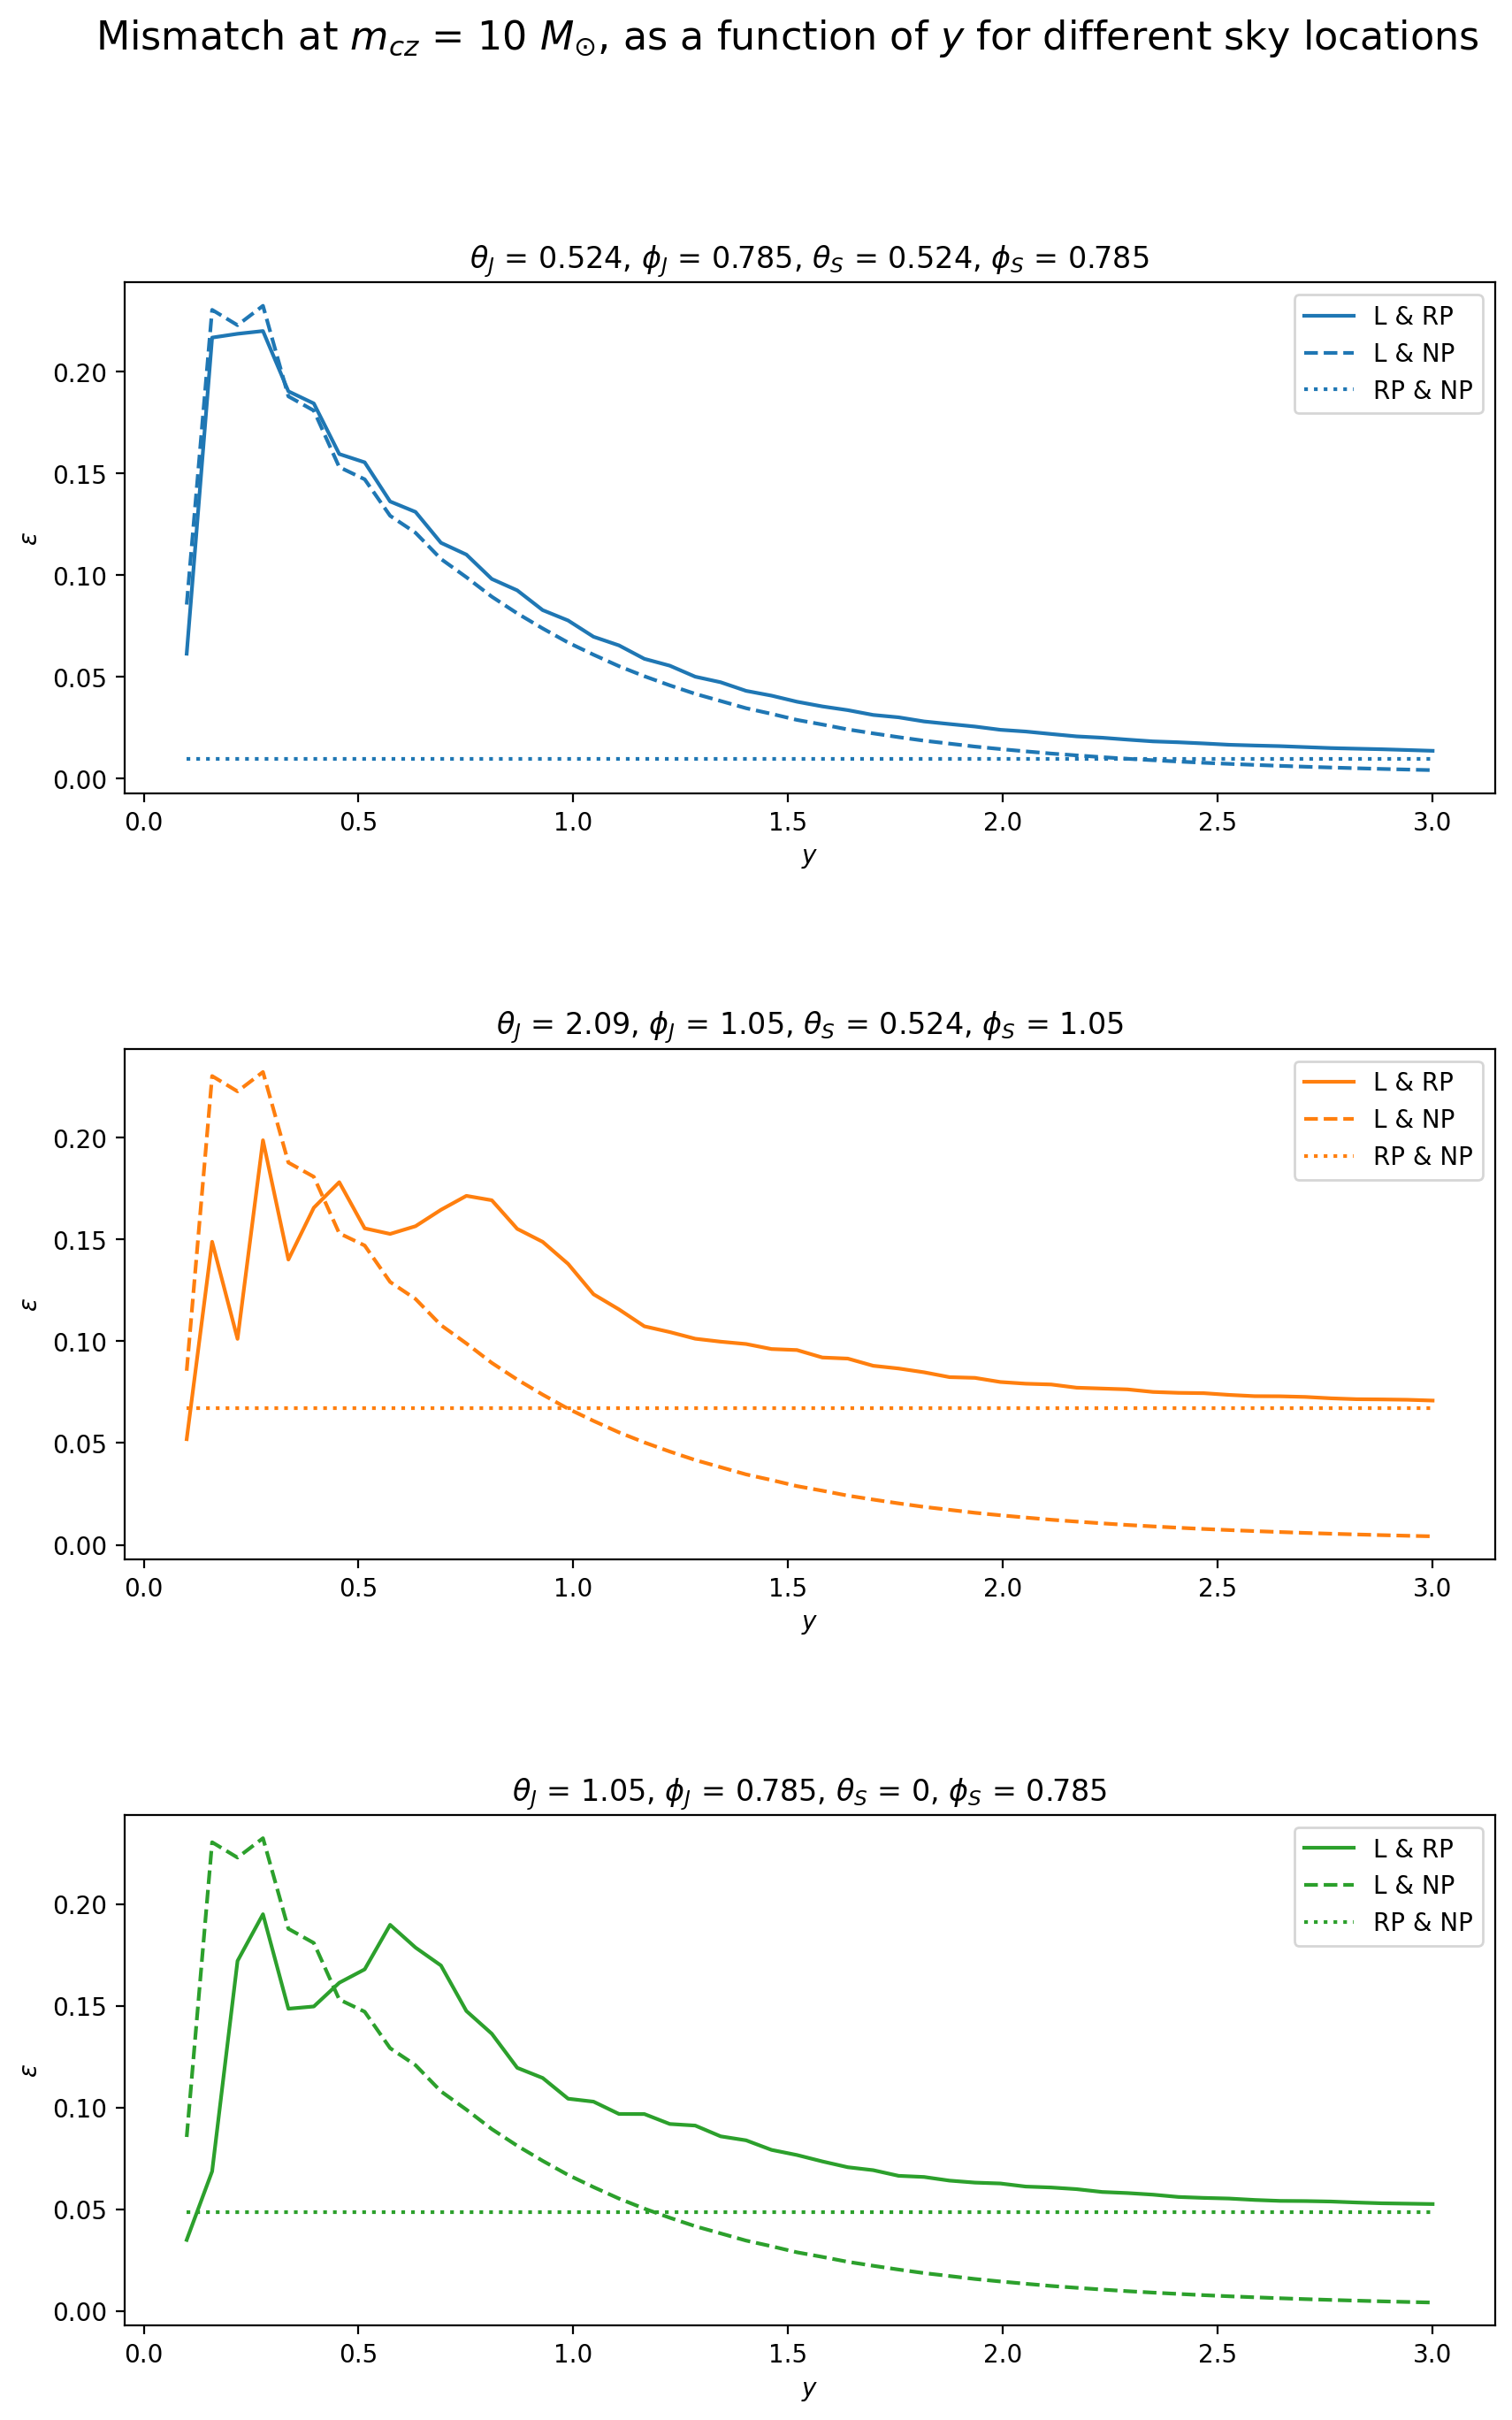

In [45]:
lensing_params = lensing_params_0.copy()
RP_params = RP_params_0.copy()
NP_params = NP_params_0.copy()

# using Saif's choice of sky locations
sky_locs_J = sky_locs_J_S.copy()
sky_locs_S = sky_locs_S_S.copy()

# assign mcz to 10
mcz = 10
lensing_params["mcz"] = RP_params["mcz"] = NP_params["mcz"] = mcz * solar_mass

# plot mismatch panel as a function of y
y_array = np.linspace(0.1, 3, 50)

mismatch_plot_panel(
    "y",
    1,
    y_array,
    r"$y$",
    r"Mismatch at $m_{cz}$ = 10 $M_{\odot}$, as a function of $y$ for different sky locations",
)

/var/folders/y_/v4l1jv1j5b55928djlvnhnm40000gp/T/ipykernel_44476/203111816.py:137: RuntimeWarning: divide by zero encountered in divide
  tan_psi = num_psi / den_psi


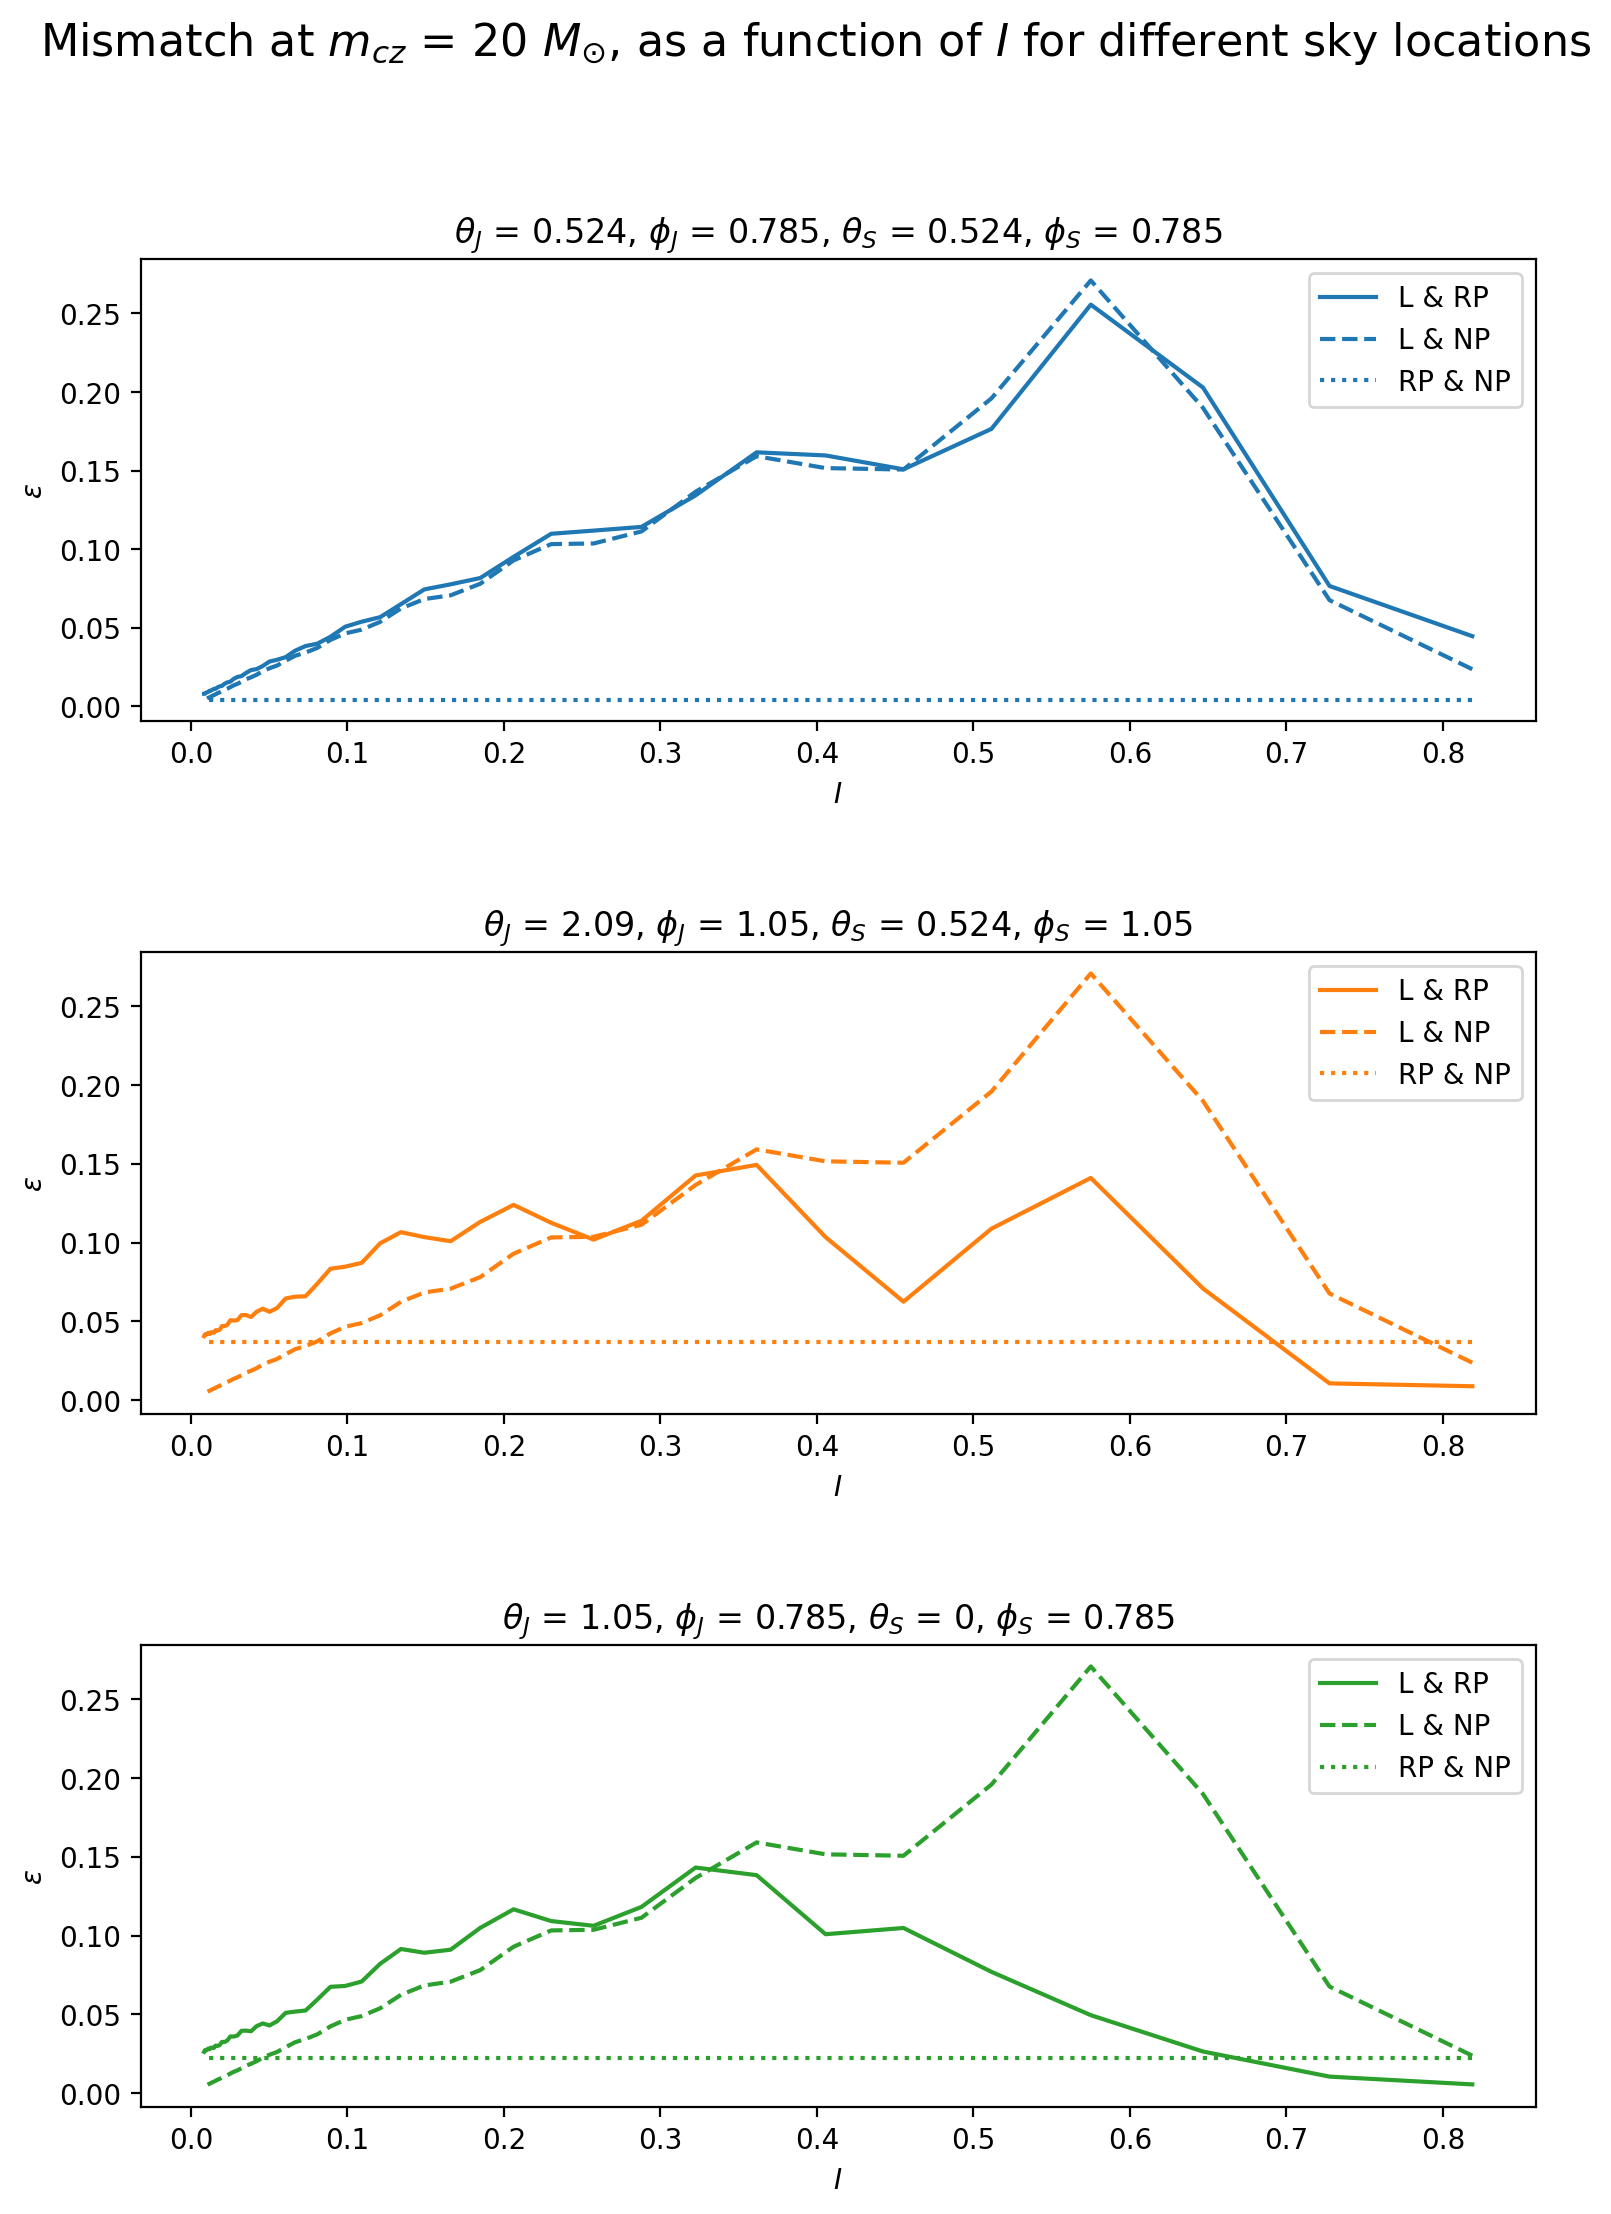

In [11]:
lensing_params = lensing_params_0.copy()
RP_params = RP_params_0.copy()
NP_params = NP_params_0.copy()

# using Saif's choice of sky locations
sky_locs_J = sky_locs_J_S.copy()
sky_locs_S = sky_locs_S_S.copy()

# assign mcz to 20
mcz = 20
lensing_params["mcz"] = RP_params["mcz"] = NP_params["mcz"] = mcz * solar_mass

# plot mismatch panel as a function of I(y)
y_array = np.linspace(0.1, 3, 50)

mismatch_plot_panel(
    "y",
    1,
    y_array,
    r"$I$",
    r"Mismatch at $m_{cz}$ = 20 $M_{\odot}$, as a function of $I$ for different sky locations",
)

/var/folders/y_/v4l1jv1j5b55928djlvnhnm40000gp/T/ipykernel_44476/203111816.py:137: RuntimeWarning: divide by zero encountered in divide
  tan_psi = num_psi / den_psi


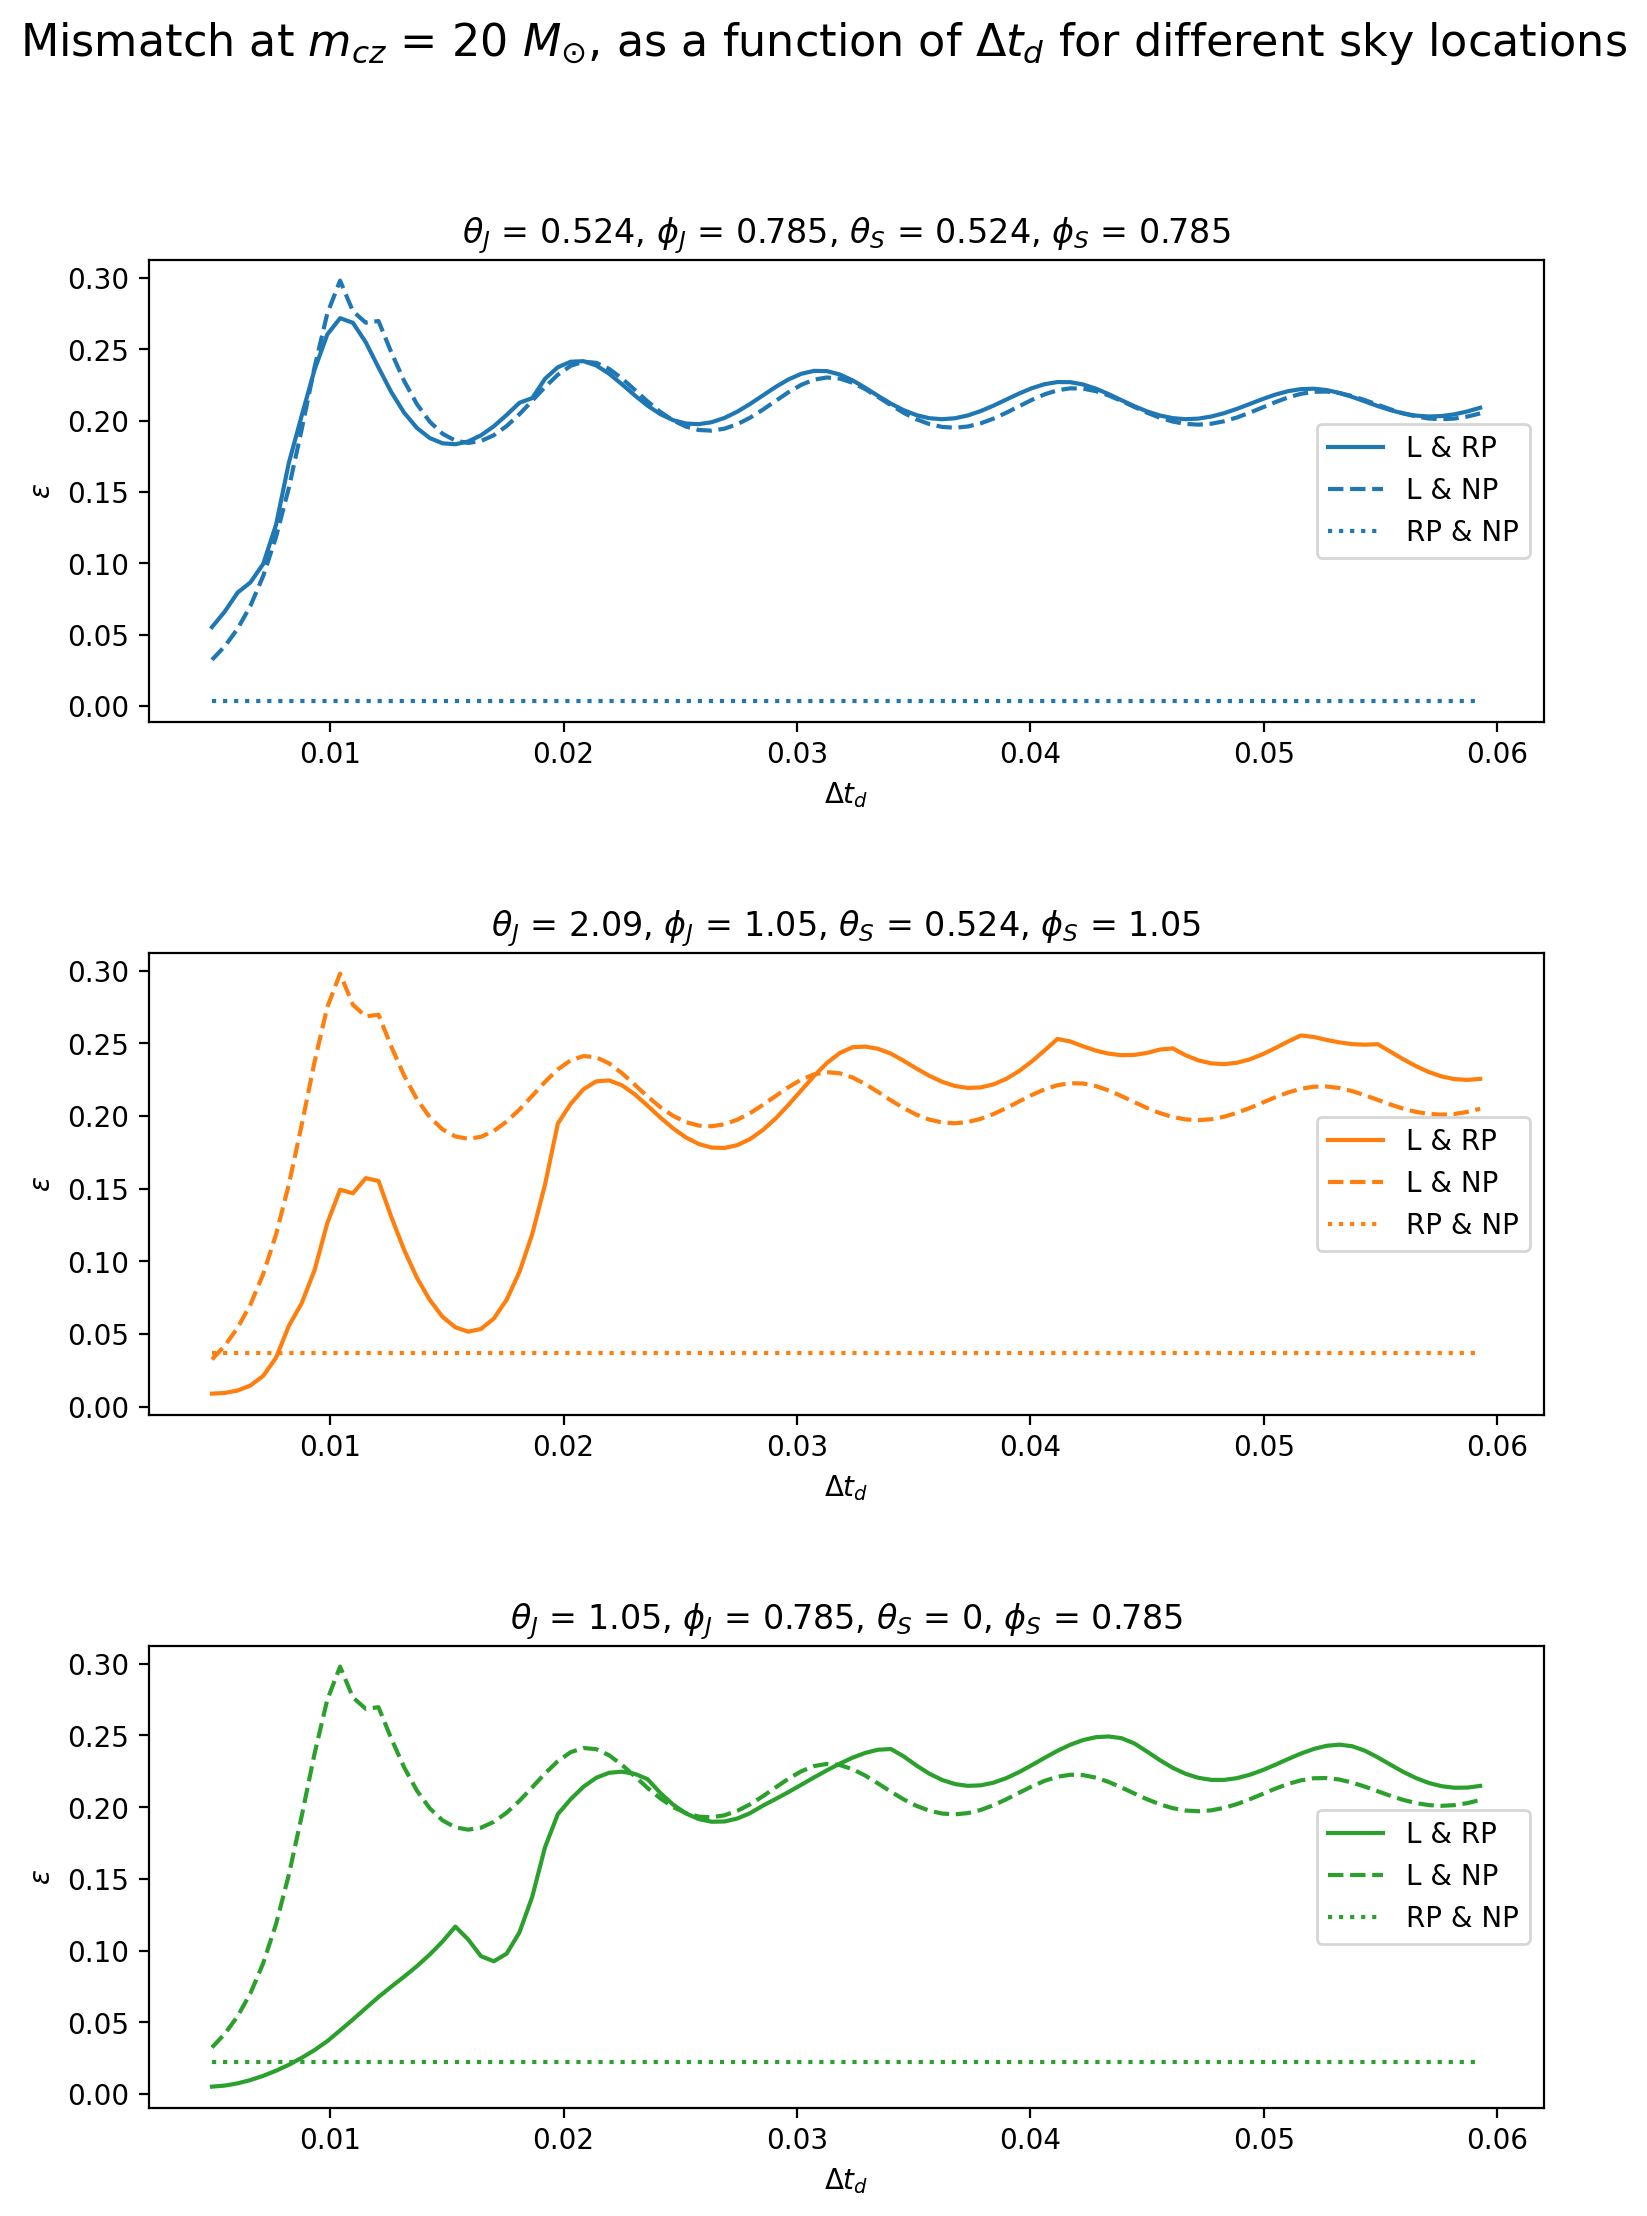

In [12]:
lensing_params = lensing_params_0.copy()
RP_params = RP_params_0.copy()
NP_params = NP_params_0.copy()

# using Saif's choice of sky locations
sky_locs_J = sky_locs_J_S.copy()
sky_locs_S = sky_locs_S_S.copy()

# assign mcz to 20
mcz = 20
lensing_params["mcz"] = RP_params["mcz"] = NP_params["mcz"] = mcz * solar_mass

# plot mismatch panel as a function of Delta_td(MLz, y)
MLz_array = np.linspace(500, 6000, 100)

mismatch_plot_panel(
    "MLz",
    solar_mass,
    MLz_array,
    r"$\Delta t_d$",
    r"Mismatch at $m_{cz}$ = 20 $M_{\odot}$, as a function of $\Delta t_d$ for different sky locations",
)

/var/folders/y_/v4l1jv1j5b55928djlvnhnm40000gp/T/ipykernel_78489/203111816.py:137: RuntimeWarning: divide by zero encountered in divide
  tan_psi = num_psi / den_psi


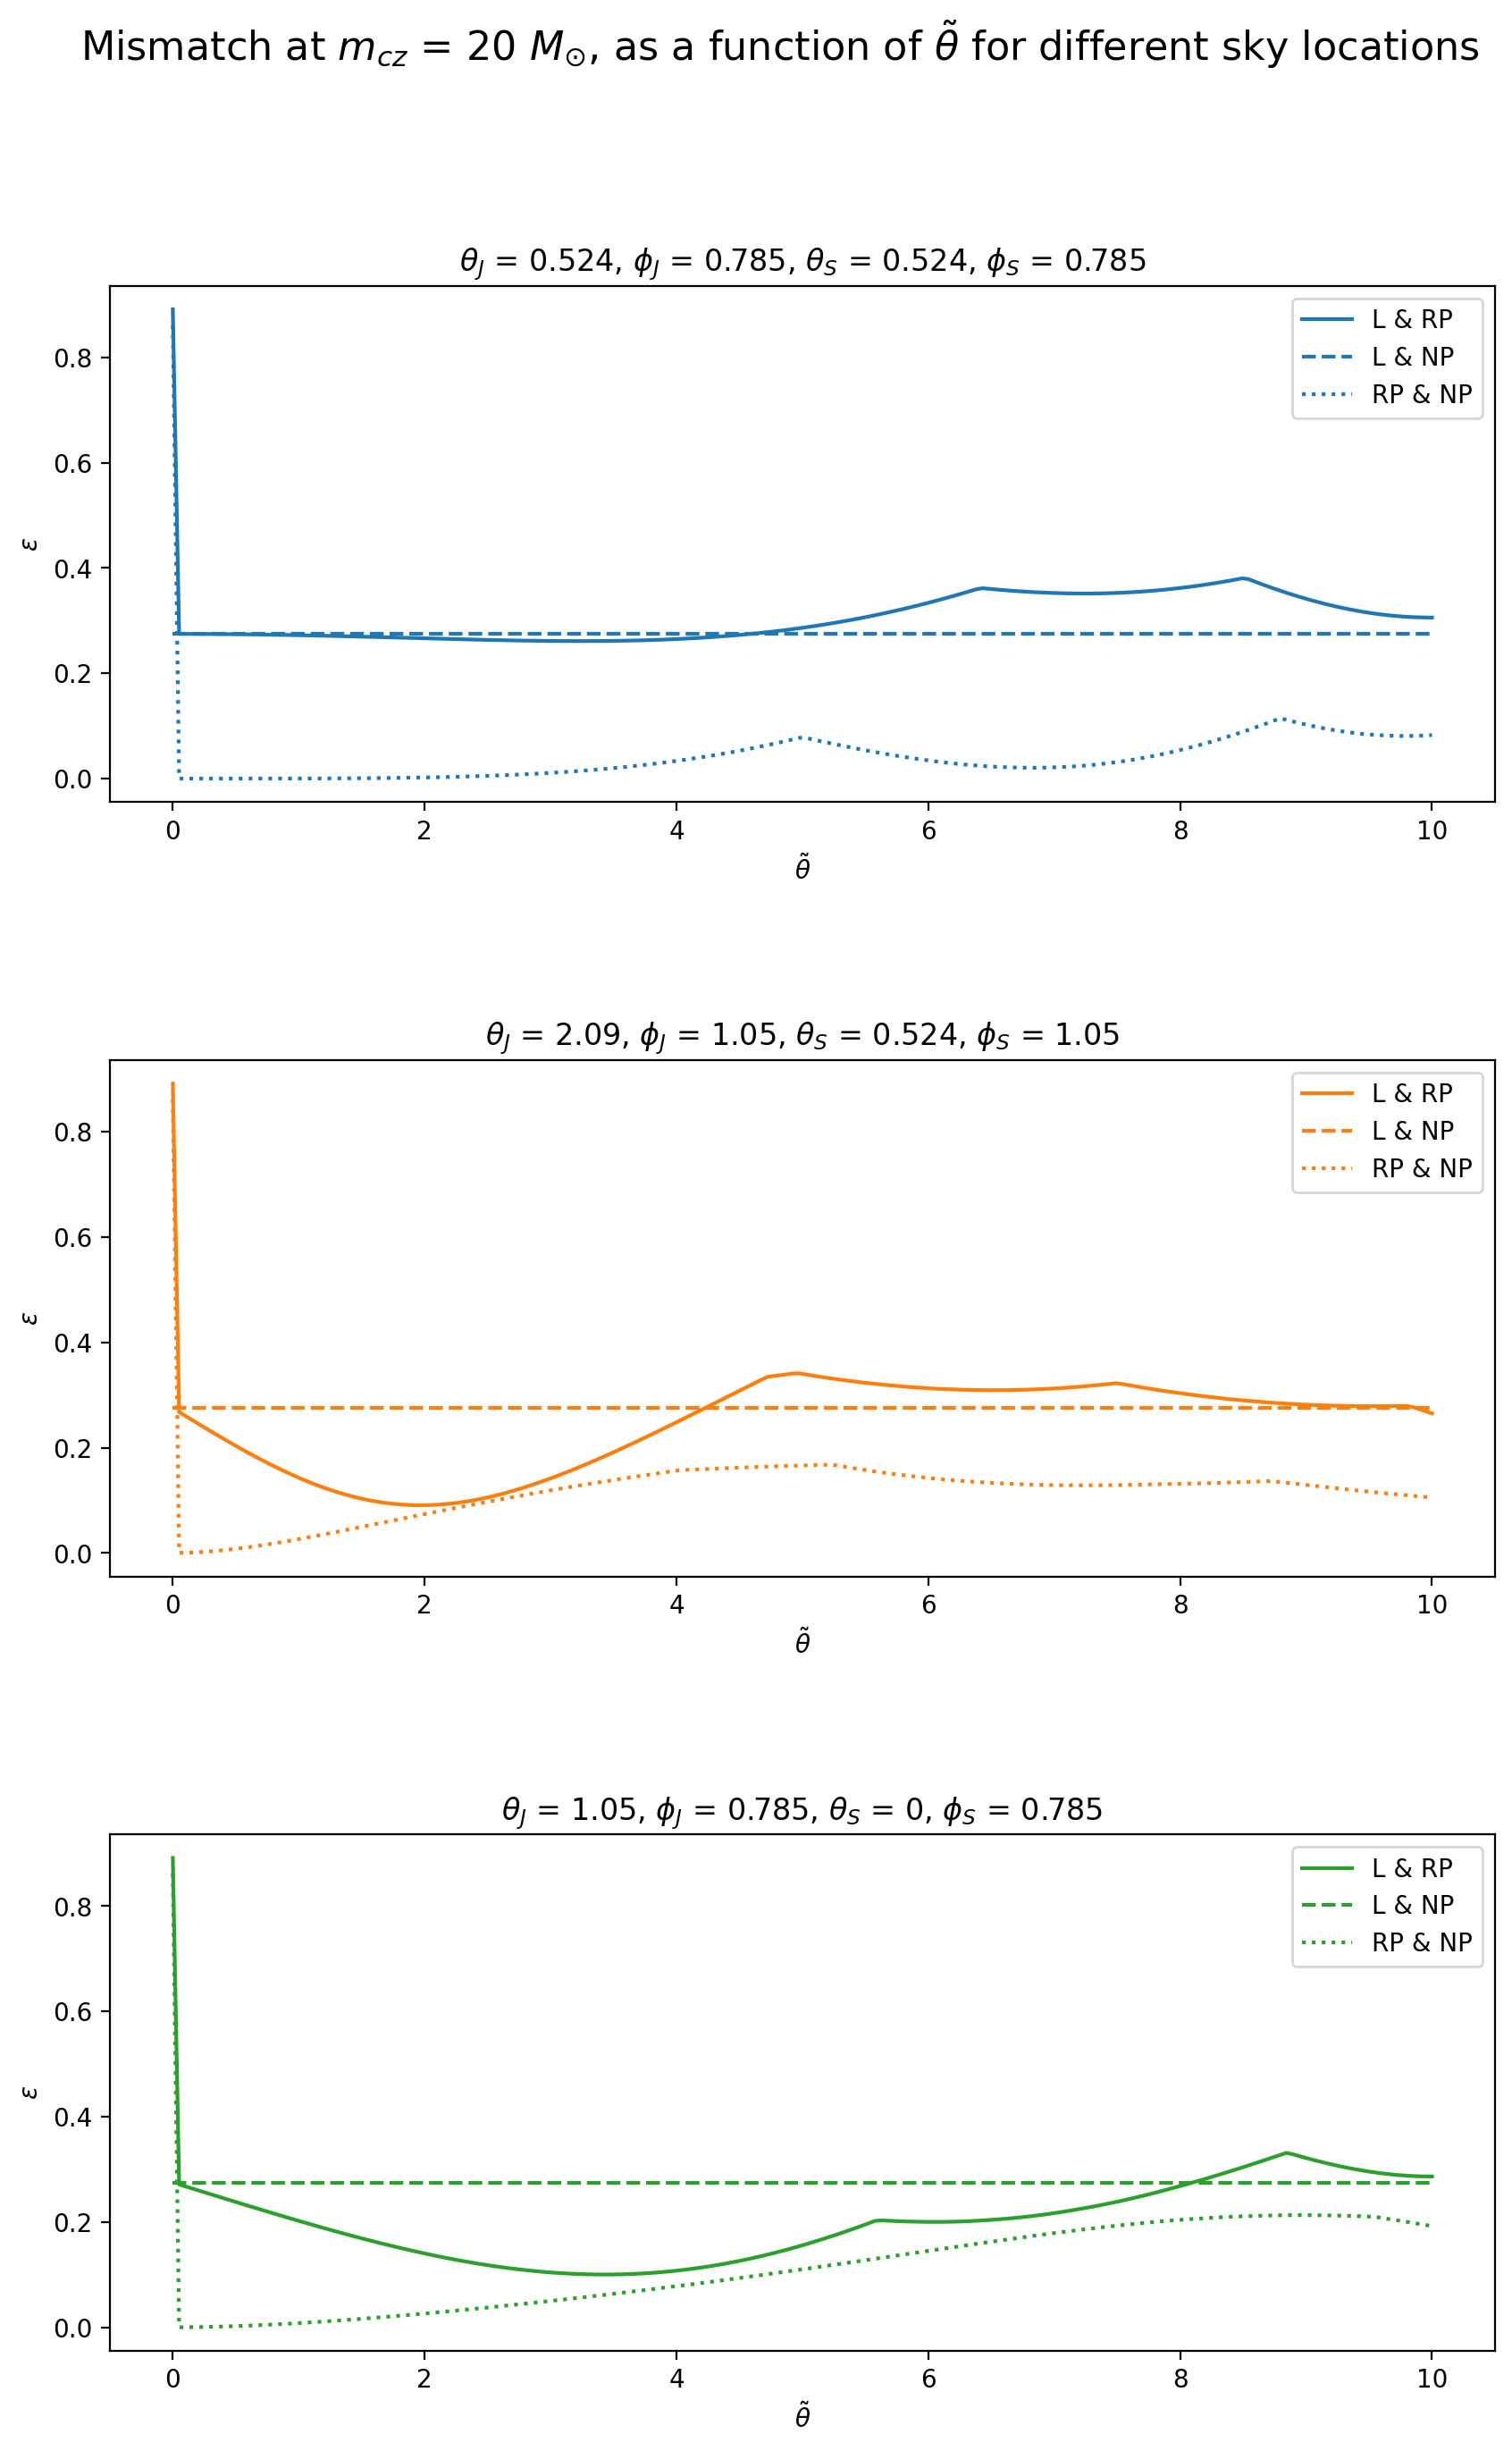

In [41]:
lensing_params = lensing_params_0.copy()
RP_params = RP_params_0.copy()
NP_params = NP_params_0.copy()

# using Saif's choice of sky locations
sky_locs_J = sky_locs_J_S.copy()
sky_locs_S = sky_locs_S_S.copy()

# assign mcz to 20
mcz = 20
lensing_params["mcz"] = RP_params["mcz"] = NP_params["mcz"] = mcz * solar_mass

# assign omega_tilde to 5
omega_tilde = 3
RP_params["omega_tilde"] = omega_tilde

# plot mismatch panel as a function of theta_tilde
theta_tilde_array = np.linspace(0, 10, 200)

mismatch_plot_panel(
    "theta_tilde",
    1,
    theta_tilde_array,
    r"$\tilde{\theta}$",
    r"Mismatch at $m_{cz}$ = 20 $M_{\odot}$, as a function of $\tilde{\theta}$ for different sky locations",
)

/var/folders/y_/v4l1jv1j5b55928djlvnhnm40000gp/T/ipykernel_78489/203111816.py:137: RuntimeWarning: divide by zero encountered in divide
  tan_psi = num_psi / den_psi


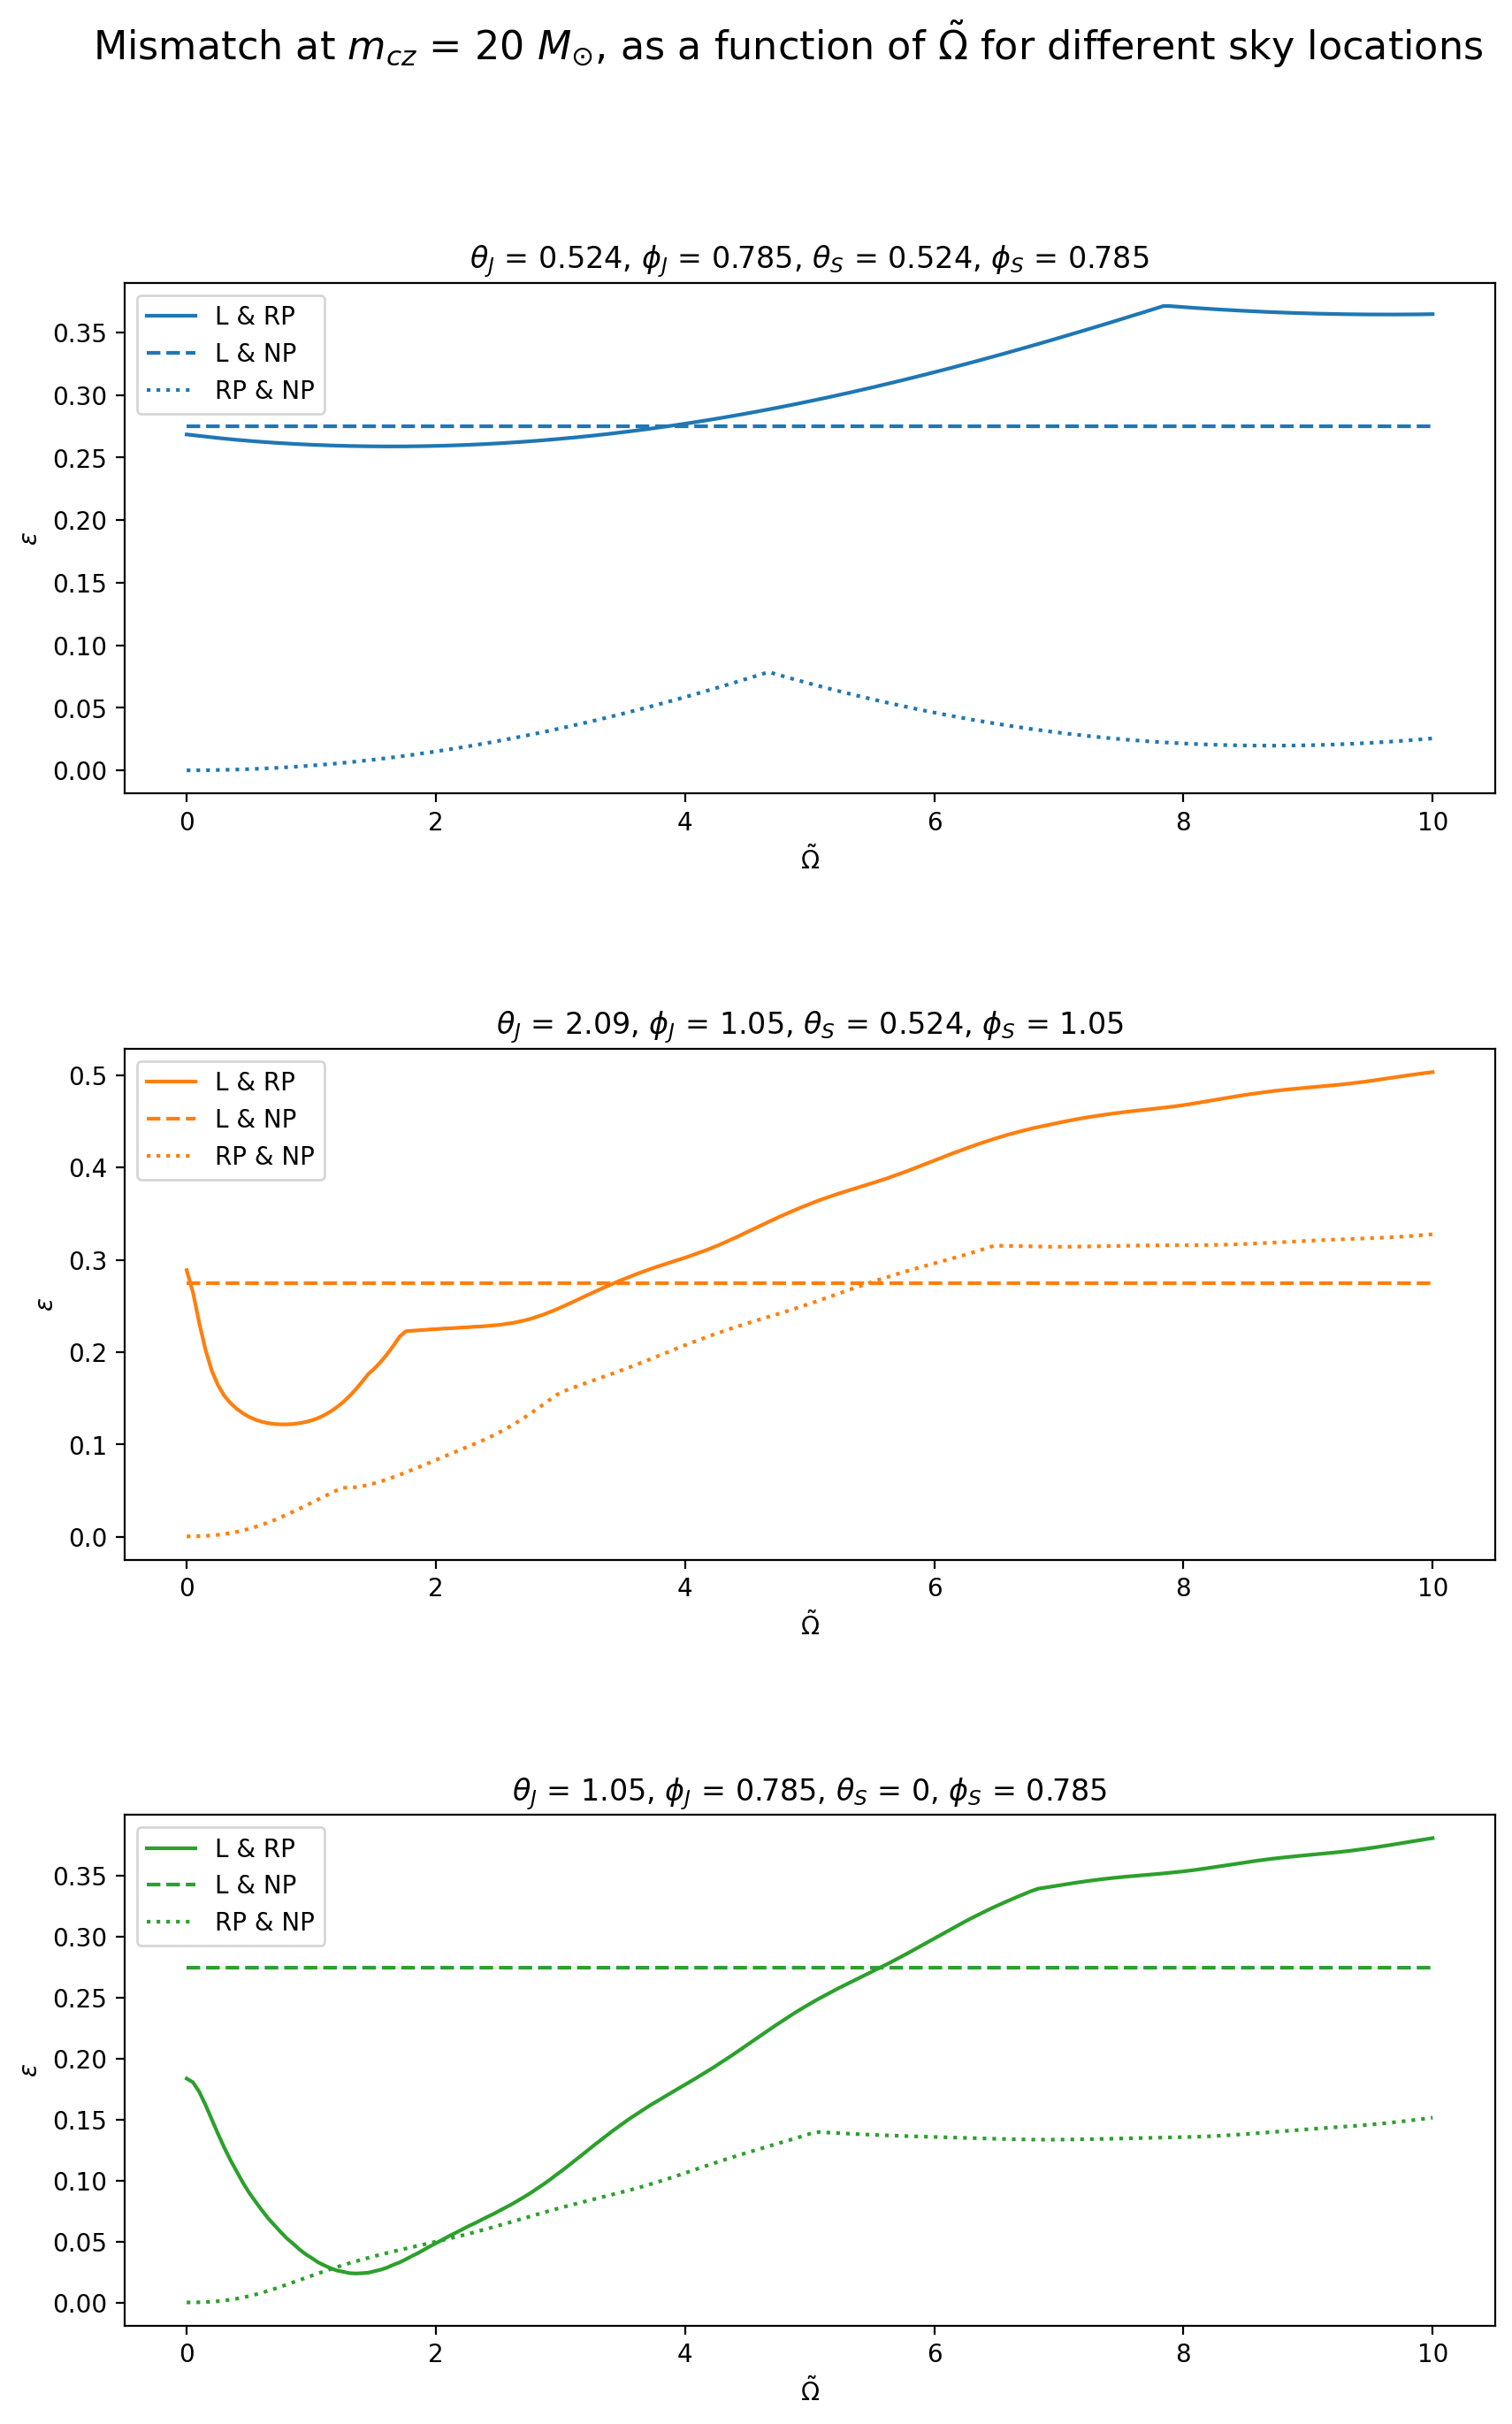

In [39]:
lensing_params = lensing_params_0.copy()
RP_params = RP_params_0.copy()
NP_params = NP_params_0.copy()

# using Saif's choice of sky locations
sky_locs_J = sky_locs_J_S.copy()
sky_locs_S = sky_locs_S_S.copy()

# assign mcz to 20
mcz = 20
lensing_params["mcz"] = RP_params["mcz"] = NP_params["mcz"] = mcz * solar_mass

# plot mismatch panel as a function of omega_tilde
omega_tilde_array = np.linspace(0, 10, 200)

mismatch_plot_panel(
    "omega_tilde",
    1,
    omega_tilde_array,
    r"$\tilde{\Omega}$",
    r"Mismatch at $m_{cz}$ = 20 $M_{\odot}$, as a function of $\tilde{\Omega}$ for different sky locations",
)